# **`Case Study for Bank Loan Defaulters`**

In [1]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# **`Data Cleaning and preparation`**

## 1. Load data

In [3]:
#Read the Data into DataFrame df
df=pd.read_csv('application_data.csv')

## 2. Data Inspection (Info, describe,shape)

In [4]:
# Describe the data frame
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [5]:
#Check the shape of the dataframe
df.shape

(307511, 122)

In [6]:
#Check Datatype of columns
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

## 3. Missing value check

In [7]:
#Check the null count % of columns 
round(100*df.isnull().sum()/len(df),2)


SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

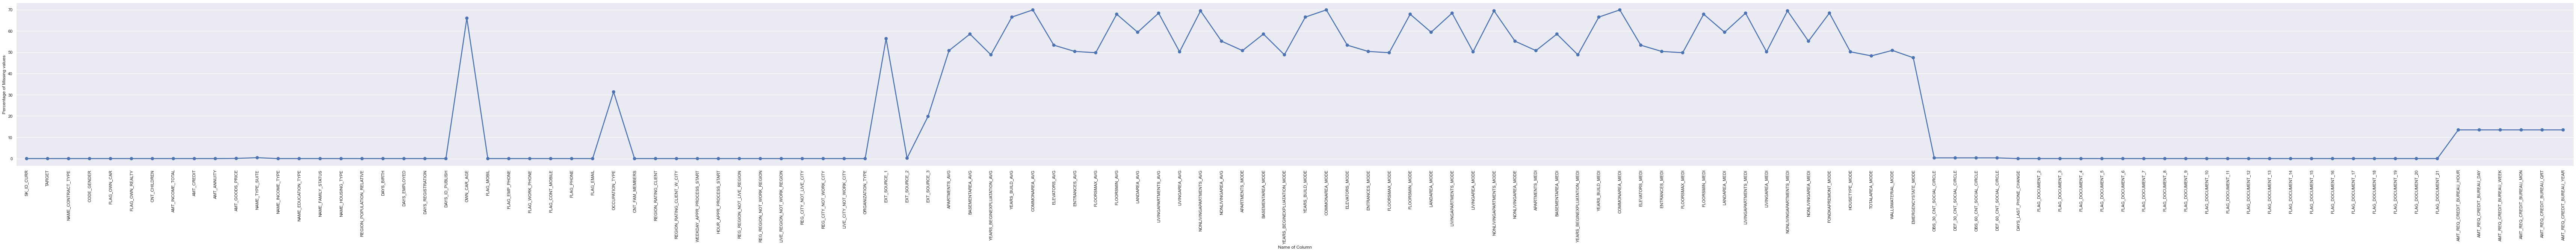

In [8]:
sns.set_theme()
plt.figure(figsize=[len(df.columns),8])
plt.ylabel('Percentage of Missing values')
plt.xlabel('Name of Column')
plt.xticks(rotation=90)
sns.pointplot(x=df.columns, y=round(100*df.isnull().sum()/df.shape[0],2))
plt.show()

### 3.1 More than 50% null values - Approach: directly drop the columns

In [9]:
#store details of column having null count more than 50 % in df_col_del
df_col_del=df.columns[round(100*df.isnull().sum()/len(df),2) > 50]
df_col_del

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE'],
      dtype='object')

In [10]:
#dropping columns with more than 50% null values
df.drop(df_col_del,axis=1,inplace=True)

In [11]:
df.shape

(307511, 81)

### 3.2  Less than 13% null values 

In [12]:
#Checking for columns having less than 13 % of missing value and imputing those values
d_c=df.columns[(100*df.isnull().sum()/len(df) < 13) & (100*df.isnull().sum()/len(df) > 0)]

In [13]:
df[d_c].head(10)

AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE  CNT_FAM_MEMBERS  \
0      24700.5         351000.0    Unaccompanied              1.0   
1      35698.5        1129500.0           Family              2.0   
2       6750.0         135000.0    Unaccompanied              1.0   
3      29686.5         297000.0    Unaccompanied              2.0   
4      21865.5         513000.0    Unaccompanied              1.0   
5      27517.5         454500.0  Spouse, partner              2.0   
6      41301.0        1395000.0    Unaccompanied              3.0   
7      42075.0        1530000.0    Unaccompanied              2.0   
8      33826.5         913500.0         Children              2.0   
9      20250.0         405000.0    Unaccompanied              1.0   

   EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0      0.262949                       2.0                       2.0   
1      0.622246                       1.0                       0.0   
2      0.555912                       0.0                       0.0   
3      0.650442                       2.0                       0.0   
4      0.322738                       0.0                       0.0   
5      0.354225                       0.0                       0.0   
6      0.724000                       1.0                       0.0   
7      0.714279                       2.0                       0.0   
8      0.205747                       1.0                       0.0   
9      0.746644                       2.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  
0                       2.0                       2.0                 -1134.0  
1                       1.0                       0.0                  -828.0  
2                       0.0                       0.0                  -815.0  
3                       2.0                       0.0                  -617.0  
4                       0.0                       0.0                 -1106.0  
5                       0.0                       0.0                 -2536.0  
6                       1.0                       0.0                 -1562.0  
7                       2.0                       0.0                 -1070.0  
8                       1.0                       0.0                     0.0  
9                       2.0                       0.0                 -1673.0

#### 3.2.1 Impute missing values for numerical columns

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


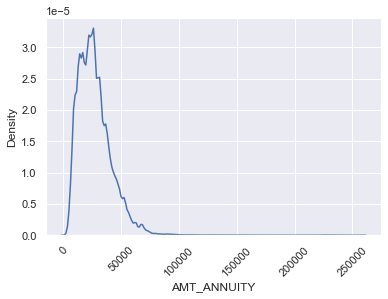

In [14]:
#Finding missing values in AMT_ANNUITY column
print(df.AMT_ANNUITY.describe())
plt.xticks(rotation=45)
sns.distplot(df.AMT_ANNUITY, kde=True, hist=False)
plt.show()

In [15]:
# From the above plot its clear distribution is skewed, median method has been considered to fill the missing value
df.AMT_ANNUITY.fillna(df.AMT_ANNUITY.median(),inplace=True)
df.AMT_ANNUITY.isnull().sum()

0

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


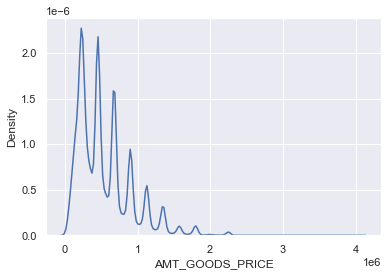

In [16]:
#Finding missing values in AMT_GOODS_PRICE column
print(df.AMT_GOODS_PRICE.describe())
sns.distplot(df.AMT_GOODS_PRICE, kde=True, hist=False)
plt.show()

In [17]:
#Finding missing values in AMT_GOODS_PRICE column mean method has been considered to fill the missing value

df.AMT_GOODS_PRICE.fillna(df.AMT_GOODS_PRICE.mean(),inplace=True)
#df.AMT_GOODS_PRICE.describe().plot(kind='box')
df.AMT_GOODS_PRICE.isnull().sum()

0

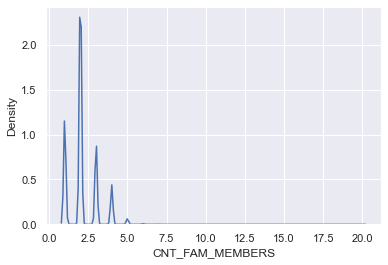

In [18]:
#Finding missing values for CNT_FAM_MEMBERS 
sns.distplot(df.CNT_FAM_MEMBERS, kde=True, hist=False)
plt.show()

In [19]:
# the distribution plot contains multiple peaks,therefore we will consider the mode method to impute the value
df.CNT_FAM_MEMBERS.fillna(df.CNT_FAM_MEMBERS.mode()[0],inplace=True)
df.CNT_FAM_MEMBERS.isnull().sum()

0


#### 3.2.2 Missing value imputation for categorical columns

In [20]:
#Finding missing values in NAME_TYPE_SUITE column mode method has been considered to fill the missing value

df.NAME_TYPE_SUITE.fillna(df.NAME_TYPE_SUITE.mode()[0],inplace=True)
df.NAME_TYPE_SUITE.isnull().sum()


0

In [21]:
#Checking the null count again
df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                          0
AMT_GOODS_PRICE                      0
NAME_TYPE_SUITE                      0
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE               

In [22]:
#Dropping columns which are not helpful for the analysis 
#dd=df.loc[:,'EXT_SOURCE_2':]
df.drop(df.loc[:,'EXT_SOURCE_2':].columns,inplace=True,axis=1)
df.drop(df.loc[:,'FLAG_MOBIL':'FLAG_EMAIL'].columns,inplace=True,axis=1)
df.shape

(307511, 34)

In [23]:
#checking the null count again
round(df.isnull().sum()/df.shape[0]*100,2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.00
NAME_TYPE_SUITE                 0.00
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
R

### 3.3 Missing values between 13% and 50%

In [24]:
# Ocuupation type is categorical and has more than 30 % missing values lets analyze the column
df.OCCUPATION_TYPE.value_counts(normalize=True)

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

In [25]:
# Imputation approach: Create a new category "Not Available" for the null values in OCCUPATION_TYPE
df.loc[df.OCCUPATION_TYPE.isnull(), 'OCCUPATION_TYPE'] = 'Not Available'
df.OCCUPATION_TYPE.value_counts(normalize=True)

Not Available            0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: OCCUPATION_TYPE, dtype: float64

## 4. Outlier Analysis

 Y scale is in log


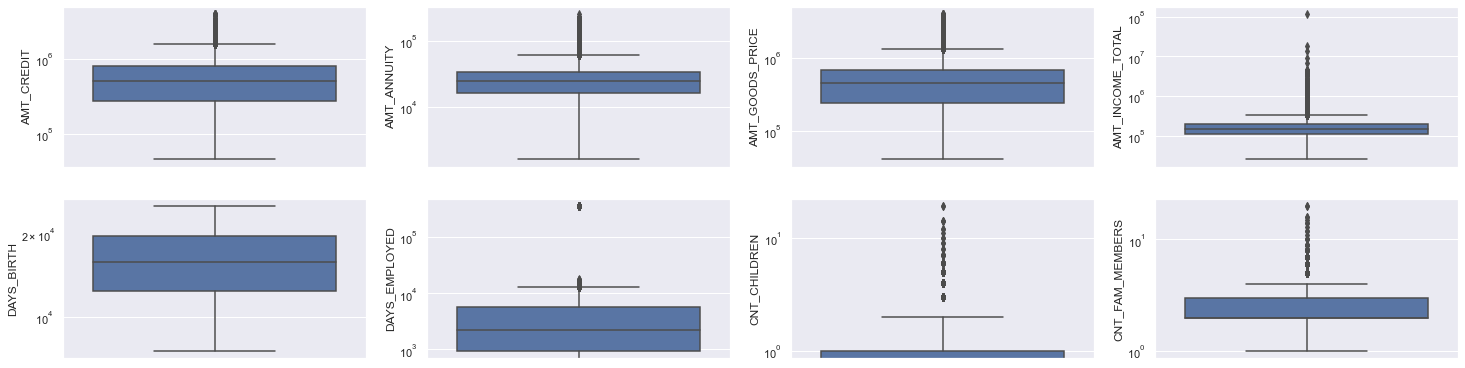

In [26]:
print(' Y scale is in log')
out_var = ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED','CNT_CHILDREN', 'CNT_FAM_MEMBERS']
i=1
plt.figure(figsize=[25,10])
for col in out_var:
    plt.subplot(3,4,i)
    plt.yscale('log')
    sns.boxplot(y=abs(df[col]))
    i=i+1
    

**`Inferences from above plots`**:
1. 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE' have almost continous distribution.
2. 'DAYS_BIRTH' has no outliers
2. 'CNT_CHILDREN' and 'CNT_FAM_MEMBERS' have few outliers

In [27]:
# analyzing variables which seems to have outliers
print(df[['AMT_INCOME_TOTAL','DAYS_EMPLOYED']].describe())

       AMT_INCOME_TOTAL  DAYS_EMPLOYED
count      3.075110e+05  307511.000000
mean       1.687979e+05   63815.045904
std        2.371231e+05  141275.766519
min        2.565000e+04  -17912.000000
25%        1.125000e+05   -2760.000000
50%        1.471500e+05   -1213.000000
75%        2.025000e+05    -289.000000
max        1.170000e+08  365243.000000


**`Inferences`** - 
4. AMT_INCOME_TOTAL clearly have outliers which shows some loan applicants have incomes in high brackets.

5. DAYS_EMPLOYED have exceptionally high value i.e. 365243 days which is around 1000 years. This is an impossible value and need to be imputed through capping.

## 5. Standardisation Data Quality/ Sanity Checks

In [28]:
#Finding the categorical columns and its respective data type
#Storing details in a dictionary
dict_unique_rec=dict(df.nunique().sort_values())


In [29]:
# Dictionary dict_unique_rec contains no of unique records in a column as its value

In [30]:
# assuming there can be a maximum of 100 categories in column
dict_unique_rec=dict(df.nunique().sort_values())
print('Column_name No_of_unique_records unique_values column_data_type')
for i,j in dict_unique_rec.items():
    if j < 100:
        print(i,j,df[i].unique(),df[i].dtype)

Column_name No_of_unique_records unique_values column_data_type
REG_CITY_NOT_LIVE_CITY 2 [0 1] int64
REG_REGION_NOT_LIVE_REGION 2 [0 1] int64
REG_REGION_NOT_WORK_REGION 2 [0 1] int64
LIVE_REGION_NOT_WORK_REGION 2 [0 1] int64
REG_CITY_NOT_WORK_CITY 2 [0 1] int64
LIVE_CITY_NOT_WORK_CITY 2 [0 1] int64
FLAG_OWN_CAR 2 ['N' 'Y'] object
NAME_CONTRACT_TYPE 2 ['Cash loans' 'Revolving loans'] object
TARGET 2 [1 0] int64
FLAG_OWN_REALTY 2 ['Y' 'N'] object
REGION_RATING_CLIENT_W_CITY 3 [2 1 3] int64
CODE_GENDER 3 ['M' 'F' 'XNA'] object
REGION_RATING_CLIENT 3 [2 1 3] int64
NAME_EDUCATION_TYPE 5 ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree'] object
NAME_HOUSING_TYPE 6 ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment'] object
NAME_FAMILY_STATUS 6 ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown'] object
WEEKDAY_APPR_PROCESS_START 7 ['WEDNESDAY

#### 5.1 Columns containing hidden missing values as XNA

In [31]:
#Columns CODE_GENDER  and ORGANIZATION_TYPE have values like XNA lets analyze
df.CODE_GENDER.value_counts(normalize=True) 

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64

In [32]:
#Since the percentage of XNA value is comparatively very low lets replace it with the mode value of its column
df.loc[df.CODE_GENDER=='XNA','CODE_GENDER']='F'
df.CODE_GENDER.value_counts(normalize=True) 

F    0.658357
M    0.341643
Name: CODE_GENDER, dtype: float64

In [33]:
#Lets analyze the organization type column
df.ORGANIZATION_TYPE.value_counts(normalize=True)*100
# Organization type column is having 18 % cases with XNA values.
#We can either delete these records or create a seperate category as Not Specified


Business Entity Type 3    22.110429
XNA                       18.007161
Self-employed             12.491260
Other                      5.425172
Medicine                   3.639870
Business Entity Type 2     3.431747
Government                 3.383294
School                     2.891929
Trade: type 7              2.546576
Kindergarten               2.237318
Construction               2.185613
Business Entity Type 1     1.945947
Transport: type 4          1.755384
Trade: type 3              1.135569
Industry: type 9           1.095245
Industry: type 3           1.065978
Security                   1.055897
Housing                    0.961917
Industry: type 11          0.879318
Military                   0.856555
Bank                       0.815255
Agriculture                0.798020
Police                     0.761274
Transport: type 2          0.716722
Postal                     0.701438
Security Ministries        0.641928
Trade: type 2              0.617864
Restaurant                 0

In [34]:
# Lets replace it with Not specified value
df.loc[df.ORGANIZATION_TYPE=='XNA','ORGANIZATION_TYPE']='Not Specified'

### 5.2 Negative values in days columns

In [35]:
#Lets Analyze DAYS_BIRTH and DAYS_EMPLOYED columns
#There are negative values in DAYS_BIRTH columns lets replace it since birth date cant be negative
df['DAYS_BIRTH']=df['DAYS_BIRTH'].apply(lambda x: abs(x) if x< 0 else x)

In [36]:
# DAYS_EMPLOYED contain the number of days the client has worked in a company at the time of loan application
# There can be Two scenario 1) +ve days refer to client emploeyed in a organiztion -ve days refer to days the client left the organiztion
#2) It could be issue at the data level
# In our case lets consider its a data issue lets replace all negative values to positive.
df['DAYS_EMPLOYED'].describe()
df['DAYS_EMPLOYED']=df['DAYS_EMPLOYED'].apply(lambda x: abs(x) if x< 0 else x)

### 5.3 Other conversions

In [37]:
# Converting DAYS_BIRTH column to AGE and let Age be a whole number
df.shape
df['Age']=df.DAYS_BIRTH//365.25
df['Age'].value_counts()

df.Age.value_counts()


38    8913
37    8789
39    8739
36    8660
40    8659
27    8552
41    8465
31    8421
43    8284
42    8195
28    7997
32    7894
44    7803
30    7778
35    7754
33    7719
29    7673
34    7664
54    7616
53    7447
45    7263
46    7260
47    7012
48    6981
56    6886
52    6798
57    6733
51    6729
59    6685
49    6677
55    6535
50    6407
58    6258
60    6177
62    5525
61    5390
63    5183
64    5150
26    4555
25    4176
23    4071
24    3923
65    3001
22    2962
67    2078
66    2036
21    1276
68     760
69       1
20       1
Name: Age, dtype: int64

In [38]:
# Converting DAYS_EMPLOYED in to years
df['Employment In Years']=df['DAYS_EMPLOYED']//365.25
df['Employment In Years'].value_counts()
# Since Days employed column provides the no of days the client started working in the organization and hence employement years 
#should be in the range of 0 to 120
# Values of 999 should be excluded from the data set

999    55374
1      31845
2      29627
0      27982
3      25101
4      21801
5      16259
6      15030
7      13148
8      11467
9       8967
10      7333
11      5901
12      5323
14      4621
13      4349
15      2726
16      2325
17      2017
18      1902
19      1873
20      1611
21      1453
22      1253
23      1004
24       917
25       817
27       664
26       656
28       608
29       560
30       454
31       442
34       358
32       353
33       329
35       260
36       190
37       141
39       125
38       113
40        60
41        58
42        41
44        30
43        20
45        13
46         4
47         3
48         2
49         1
Name: Employment In Years, dtype: int64

In [39]:
#Converting the variable colums to numeric 
df.columns
num_columns=['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE',
             'DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY',
             'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
            'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','Employment In Years','Age'
            
            ]
df[num_columns].apply(pd.to_numeric)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

## 6. Binning/Bucketing of continuous variables

In [40]:
#Creating Buckets for AGE ,Employment In Years, AMT_CREDIT and AMT_INCOME_TOTAL

In [41]:
df['Age_Group']=pd.cut(df.Age,bins=[0,18,25,35,45,60,70],labels=['<18','18-25','25-35','35-45','45-60','60+'])
df.Age_Group.value_counts()

45-60    102201
35-45     83770
25-35     76007
60+       29124
18-25     16409
<18           0
Name: Age_Group, dtype: int64

In [42]:
df['Work_Group']=pd.cut(df['Employment In Years'],bins=[0,18,25,35,45,60,100],labels=['<18','18-25','25-35','35-45','45-60','60+'])
df.Work_Group.value_counts()

<18      209742
18-25      8928
25-35      4684
35-45       791
45-60        10
60+           0
Name: Work_Group, dtype: int64

In [43]:
df['AMT_CREDIT_bucket']=pd.cut(df.AMT_CREDIT,bins=[0,25000,50000,100000,250000,500000,1000000,2500000,5000000,10000000],
       labels=['<25K','25K-50K','50K-1L','1L-2.5L','2.5L-5L','5L-10L','10L-25L','25L-50L','50L<']  )                                                                       
                                                                                                       
df['Income_range']=pd.cut(df.AMT_INCOME_TOTAL,bins=[0,25000,50000,100000,250000,500000,1000000,2500000,5000000,10000000],
       labels=['<25K','25K-50K','50K-1L','1L-2.5L','2.5L-5L','5L-10L','10L-25L','25L-50L','50L<']  ) 

df.head()


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637            -3648.0   
1                    0.003541       16765           1188            -1186.0   
2                    0.010032       19046            225            -4260.0   
3                    0.008019       19005           3039            -9833.0   
4                    0.028663       19932           3038            -4311.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0            -2120        Laborers              1.0                     2   
1             -291      Core staff              2.0                     1   
2            -2531        Laborers              1.0                     2   
3            -2437        Laborers              2.0                     2   
4            -3458      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0               

#### We have compleated the data cleaning process
1. Analyzed the data set
2. Removed columns with more than 50 % null values
3. Imputed data for columns having less number of null values
4. Removed additional columns which were not helpfull in the analysis
5. Analyzed the categorical columns and found the missing value for those columns
6. Identified the outliers
7. Converted the variable columns to numeric and converted age from days to years
8. Binning of specific columns 

# **`Data Analysis`**


## Check Imabalance Percentage

In [44]:
df.TARGET.value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

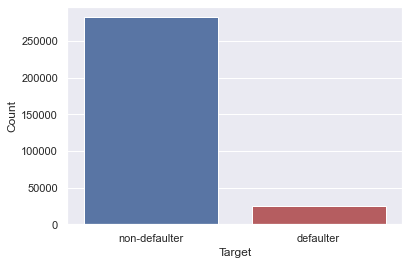

In [45]:
sns.set_theme()
sns.barplot(['non-defaulter','defaulter'],x=df.TARGET, y=df.TARGET.value_counts(),palette= ['b','r'])
plt.ylabel('Count')
plt.xlabel('Target')
plt.show()

## Dividing data into two datasets based on Target=0 and Target=1

In [46]:
# Checking the imbalance % of the data
(df.TARGET.value_counts(normalize=True))[0]/(df.TARGET.value_counts(normalize=True))[1]

11.387150050352467

In [47]:
# Lets divide the data into two set 0-Non Defaulter 1-Defaulter

In [48]:
df_target1=df[df.TARGET==1]
df_target0=df[df.TARGET==0]

In [49]:
# Lets perform the Analysis on Non Defauleter data set

df_target0.describe()

SK_ID_CURR    TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  282686.000000  282686.0  282686.000000      2.826860e+05  2.826860e+05   
mean   278244.744536       0.0       0.412946      1.690777e+05  6.026483e+05   
std    102825.776954       0.0       0.718843      1.104763e+05  4.068459e+05   
min    100003.000000       0.0       0.000000      2.565000e+04  4.500000e+04   
25%    189103.250000       0.0       0.000000      1.125000e+05  2.700000e+05   
50%    278362.500000       0.0       0.000000      1.485000e+05  5.177880e+05   
75%    367241.500000       0.0       1.000000      2.025000e+05  8.100000e+05   
max    456255.000000       0.0      19.000000      1.800009e+07  4.050000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count  282686.000000     2.826860e+05               282686.000000   
mean    27163.527386     5.427328e+05                    0.021021   
std     14658.003451     3.736156e+05                    0.013978   
min      1615.500000     4.050000e+04                    0.000290   
25%     16456.500000     2.385000e+05                    0.010006   
50%     24876.000000     4.500000e+05                    0.018850   
75%     34749.000000     6.850024e+05                    0.028663   
max    258025.500000     4.050000e+06                    0.072508   

          DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  282686.000000  282686.000000      282686.000000    282686.000000   
mean    16138.176397   69668.812255       -5029.941065     -3017.219788   
std      4364.200856  140983.356991        3538.464478      1506.614090   
min      7489.000000       0.000000      -24672.000000     -7197.000000   
25%     12536.000000     967.000000       -7550.000000     -4313.000000   
50%     15877.000000    2304.000000       -4544.000000     -3295.000000   
75%     19793.750000    6074.000000       -2045.000000     -1755.000000   
max     25229.000000  365243.000000           0.000000         0.000000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count    282686.000000         282686.000000                282686.000000   
mean          2.150152              2.043578                     2.022449   
std           0.906981              0.508422                     0.501971   
min           1.000000              1.000000                     1.000000   
25%           2.000000              2.000000                     2.000000   
50%           2.000000              2.000000                     2.000000   
75%           3.000000              2.000000                     2.000000   
max          20.000000              3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            282686.000000               282686.000000   
mean                 12.086807                    0.014942   
std                   3.263173                    0.121323   
min                   0.000000                    0.000000   
25%                  10.000000                    0.000000   
50%                  12.000000                    0.000000   
75%                  14.000000                    0.000000   
max                  23.000000                    1.000000   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
count               282686.000000                282686.000000   
mean                     0.050317                     0.040494   
std                      0.218599                     0.197114   
min                      0.000000                     0.000000   
25%                      0.000000                     0.000000   
50%                      0.000000                     0.000000   
75%                      0.000000                     0.000000   
max                      1.000000                     1.000000   

       REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
count           282686.000000           282686.000000   
mean                

In [50]:
df_target1.describe()

SK_ID_CURR   TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count   24825.000000  24825.0  24825.000000      2.482500e+04  2.482500e+04   
mean   277449.167936      1.0      0.463807      1.656118e+05  5.577785e+05   
std    102383.123458      0.0      0.756903      7.466770e+05  3.464332e+05   
min    100002.000000      1.0      0.000000      2.565000e+04  4.500000e+04   
25%    189555.000000      1.0      0.000000      1.125000e+05  2.844000e+05   
50%    276291.000000      1.0      0.000000      1.350000e+05  4.975200e+05   
75%    366050.000000      1.0      1.000000      2.025000e+05  7.333155e+05   
max    456254.000000      1.0     11.000000      1.170000e+08  4.027680e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count   24825.000000     2.482500e+04                24825.000000   
mean    26481.744290     4.890142e+05                    0.019131   
std     12450.676999     3.115080e+05                    0.011905   
min      2722.500000     4.500000e+04                    0.000533   
25%     17361.000000     2.385000e+05                    0.009630   
50%     25263.000000     4.500000e+05                    0.018634   
75%     32976.000000     6.750000e+05                    0.025164   
max    149211.000000     3.600000e+06                    0.072508   

         DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  24825.000000   24825.000000       24825.000000     24825.000000   
mean   14884.828077   45587.324149       -4487.127009     -2732.099617   
std     4192.844583  118303.300421        3299.650241      1516.975313   
min     7678.000000       0.000000      -22928.000000     -6207.000000   
25%    11396.000000     677.000000       -6646.000000     -4119.000000   
50%    14282.000000    1458.000000       -4056.000000     -2797.000000   
75%    18037.000000    3280.000000       -1671.000000     -1392.000000   
max    25168.000000  365243.000000           0.000000         0.000000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count     24825.000000          24825.000000                 24825.000000   
mean          2.181269              2.153635                     2.134824   
std           0.951327              0.505052                     0.499909   
min           1.000000              1.000000                     1.000000   
25%           2.000000              2.000000                     2.000000   
50%           2.000000              2.000000                     2.000000   
75%           3.000000              2.000000                     2.000000   
max          13.000000              3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count             24825.000000                24825.000000   
mean                 11.797100                    0.017442   
std                   3.284299                    0.130914   
min                   0.000000                    0.000000   
25%                  10.000000                    0.000000   
50%                  12.000000                    0.000000   
75%                  14.000000                    0.000000   
max                  23.000000                    1.000000   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
count                24825.000000                 24825.000000   
mean                     0.055911                     0.042538   
std                      0.229755                     0.201817   
min                      0.000000                     0.000000   
25%                      0.000000                     0.000000   
50%                      0.000000                     0.000000   
75%                      0.000000                     0.000000   
max                      1.000000                     1.000000   

       REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
count            24825.000000             24825.00000   
mean                 0.118389                 0

In [51]:
df_target0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
1        1129500.0           Family    State servant   
2         135000.0    Unaccompanied          Working   
3         297000.0    Unaccompanied          Working   
4         513000.0    Unaccompanied          Working   
5         454500.0  Spouse, partner    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1                    0.003541       16765           1188            -1186.0   
2                    0.010032       19046            225            -4260.0   
3                    0.008019       19005           3039            -9833.0   
4                    0.028663       19932           3038            -4311.0   
5                    0.035792       16941           1588            -4970.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
1             -291      Core staff              2.0                     1   
2            -2531        Laborers              1.0                     2   
3            -2437        Laborers              2.0                     2   
4            -3458      Core staff              1.0                     2   
5             -477        Laborers              2.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   
5                            2                  WEDNESDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   
5                       16                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   
5                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0         

In [52]:
df_target1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
26      100031       1         Cash loans           F            N   
40      100047       1         Cash loans           M            N   
42      100049       1         Cash loans           F            N   
81      100096       1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
81               Y             0           81000.0    252000.0      14593.5   

    AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0          351000.0   Unaccompanied               Working   
26         702000.0   Unaccompanied               Working   
40         855000.0   Unaccompanied  Commercial associate   
42         238500.0   Unaccompanied               Working   
81         252000.0   Unaccompanied             Pensioner   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
26  Secondary / secondary special                 Widow  House / apartment   
40  Secondary / secondary special               Married  House / apartment   
42  Secondary / secondary special        Civil marriage  House / apartment   
81  Secondary / secondary special               Married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                     0.018801        9461            637            -3648.0   
26                    0.018029       18724           2628            -6573.0   
40                    0.025164       17482           1262            -1182.0   
42                    0.007305       13384           3597              -45.0   
81                    0.028663       24794         365243            -5391.0   

    DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0             -2120        Laborers              1.0                     2   
26            -1827   Cooking staff              1.0                     3   
40            -1029        Laborers              2.0                     2   
42            -4409     Sales staff              2.0                     3   
81            -4199   Not Available              2.0                     2   

    REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                             2                  WEDNESDAY   
26                            2                     MONDAY   
40                            2                    TUESDAY   
42                            3                   THURSDAY   
81                            2                   THURSDAY   

    HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                        10                           0   
26                        9                           0   
40                        9                           0   
42                       11                           0   
81                       10                           0   

    REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                            0                            0   
26                           0                            0   
40                           0                            0   
42                           0                            0   
81                           0                            0   

    REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                        0                       0                        0   
26                       0                       0       

In [53]:
#plt.yscale('log')
#sns.countplot(data = df_target0, x='Income_range', order=df_target0['Income_range'].value_counts().index,hue = 'CODE_GENDER',palette='magma') 

In [54]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637            -3648.0   
1                    0.003541       16765           1188            -1186.0   
2                    0.010032       19046            225            -4260.0   
3                    0.008019       19005           3039            -9833.0   
4                    0.028663       19932           3038            -4311.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0            -2120        Laborers              1.0                     2   
1             -291      Core staff              2.0                     1   
2            -2531        Laborers              1.0                     2   
3            -2437        Laborers              2.0                     2   
4            -3458      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0               

## Segmented Univariate Analysis

In [55]:
def univariate_box(df,x_lab,title):
    #plt.figure(figsize=[12,8])
    plt.title( title, fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
    plt.ylabel(x_lab,fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
    plt.ylabel('Count in log scale',fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
    sty=['bmh','seaborn-deep', 'seaborn-pastel', 'classic',  'seaborn-poster',  'tableau-colorblind10', 'seaborn-bright']
    np.random.shuffle(sty)  
    plt.style.use(sty[0])
    plt.yscale('log')
    print('Y in log scale')
    sns.boxplot(data=df,y=x_lab)
    plt.title(title)
    #plt.ylabel(x_lab)
    
    #plt.ylabel('Count in log scale')
    plt.show()


def univariate_countplot(x_axis,title, symlog, rotation):
    width=len(df[x_axis].unique())+5
    plt.figure(figsize=[width,8])
    plt.title( title, fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
    plt.style.use('bmh')
    x_axis1=x_axis.replace('_',' ')
    plt.xlabel(x_axis1,fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
    y_axis='Count of '+x_axis.replace('_',' ')+' in symetric log -->'
    plt.ylabel(y_axis,fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
    plt.xticks(rotation=rotation)
    
    if symlog == True:
        plt.yscale('symlog')
        print('Y in log scale')
    sns.countplot(data =df , x=x_axis, hue='TARGET', order=df[x_axis].value_counts().index)
    #plt.show()
    
#univariate_box(df,'AMT_CREDIT','AMT CREDIT Distribution')
#df['AMT_CREDIT'].plot.box()

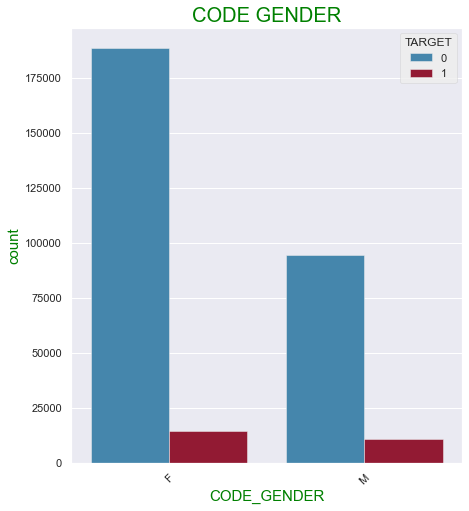

In [56]:
univariate_countplot('CODE_GENDER','CODE GENDER', False, 45)

**`Insights from above plot`**
1. The number of female clients is almost double the number of male clients. 
2. Male clients have higher chances of defaulting than females


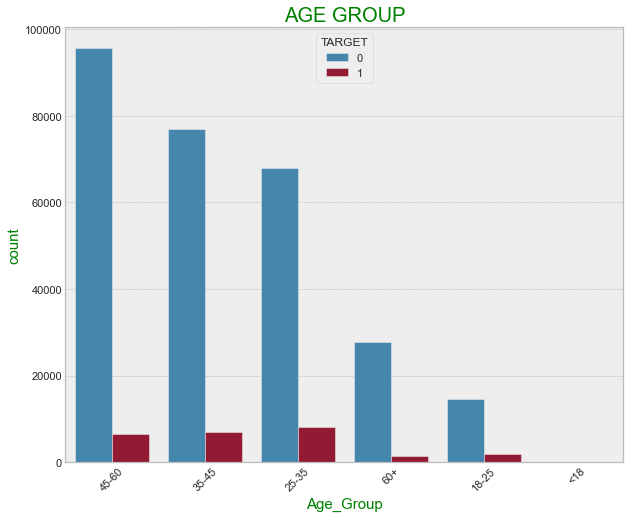

In [57]:
univariate_countplot('Age_Group','AGE GROUP', False, 45)

**`Insights from above plot`**
1. Most loan takers seems to be of age group 45 to 60.
2. People of age 25-45, have high chances of defaulting.


Y in log scale


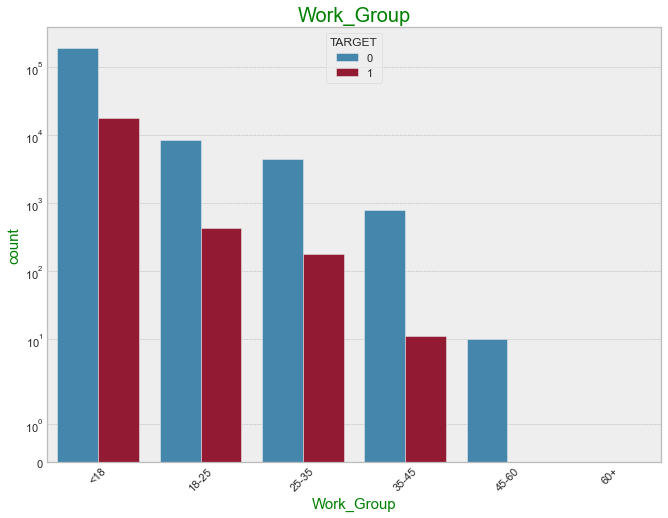

In [58]:
univariate_countplot('Work_Group','Work_Group', True, 45)

**`Insights from above plot`**
1. Customer with more than 45 years of experience has no defaulters
2. Customer with less work experience has high defaulters

Y in log scale


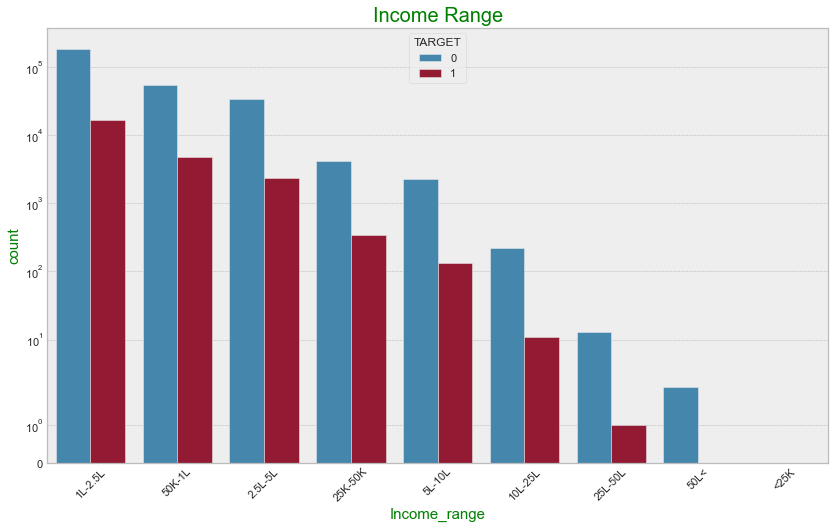

In [59]:
univariate_countplot('Income_range','Income Range', True, 45)

**`Insights from above plot`**
1. Maximum number of applications have income less than 2.5 lakh.
2. People with income less than 2.5 lakh have more chances of defaulting.
3. Applicant with income more than 5 lakhs less likely to default.


Y in log scale


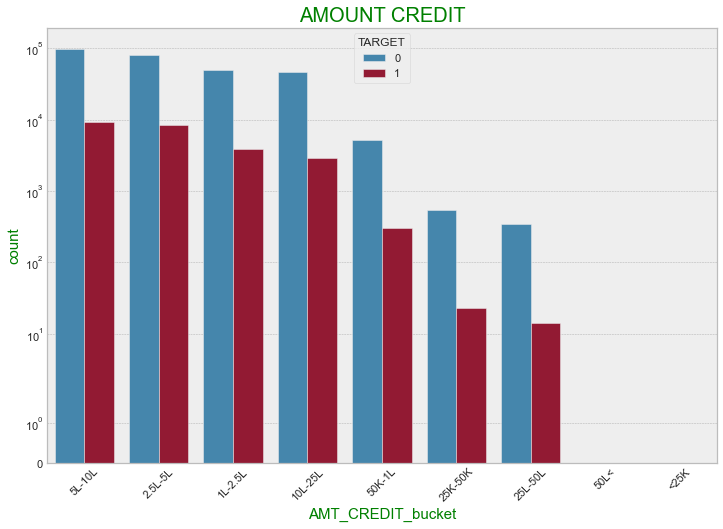

In [60]:
univariate_countplot('AMT_CREDIT_bucket','AMOUNT CREDIT', True, 45)

**`Insights from above plot`**
1. Most of the applicants got credit of less than 10 lakhs.
2. People with in credit range 2.5 lakhs to 10 lakhs tends to default more.


Y in log scale


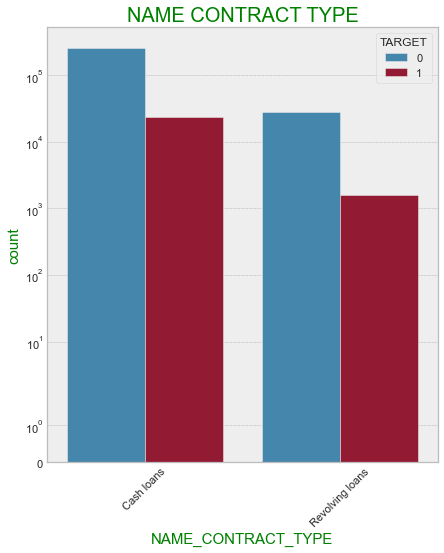

In [61]:
univariate_countplot('NAME_CONTRACT_TYPE','NAME CONTRACT TYPE', True, 45)

**`Insights from above plot`**
1. Cash loans are more popular than Revolving loans
2. Revolving loans have relatively less defaulters

Y in log scale


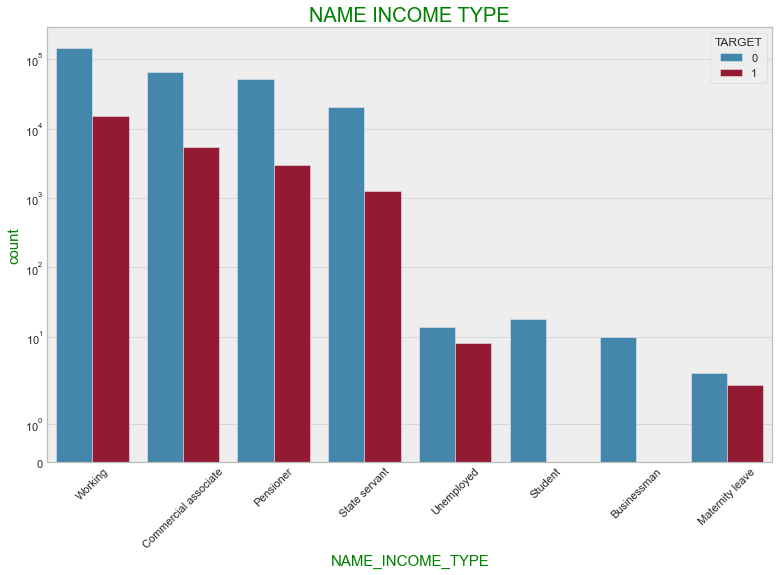

In [62]:
univariate_countplot('NAME_INCOME_TYPE','NAME INCOME TYPE', True, 45)

**`Insights from above plot`**
1. Most of the applicants of loan have income type Working followed by Commercial associates then Prisoner and State servant. 
2. Student and Businessman seems to be the safest categories with no default rates.
3. People in category Unemployed and Maternity leave have the highest chances of defaulting.


Y in log scale


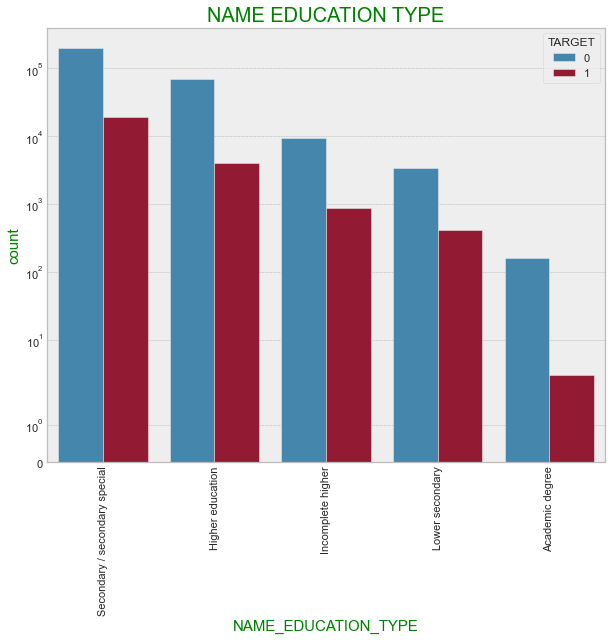

In [63]:
univariate_countplot('NAME_EDUCATION_TYPE','NAME EDUCATION TYPE', True,90)

**`Insights from above plot`**
1. Most of the applicants comes from category Secondary/ secondary special and higher education. 
2. Academic degree though have less number of clients but have relatively low number of defaults.


Y in log scale


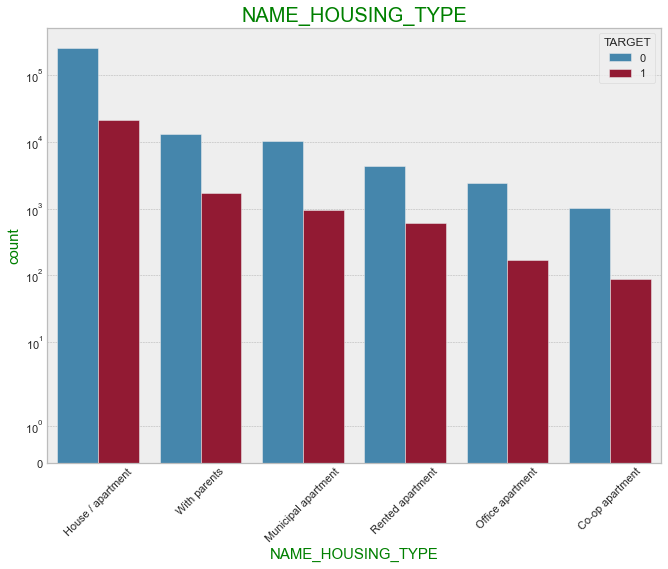

In [64]:
univariate_countplot('NAME_HOUSING_TYPE','NAME_HOUSING_TYPE', True, 45)

**`Insights from above plot`**
1. Most of the applicants comes from category Secondary/ secondary special and higher education. 
2. Academic degree though have less number of clients but have relatively low number of defaults.


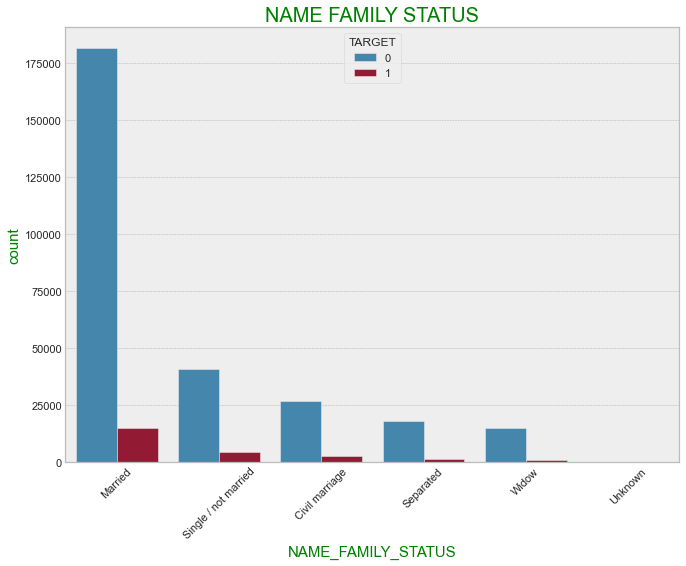

In [65]:
univariate_countplot('NAME_FAMILY_STATUS','NAME FAMILY STATUS', False, 45)

**`Insights from above plot`**
1. Most of the loan applicants are married followed by single/not married.
2. Married and widow seems less likely to default.


Y in log scale


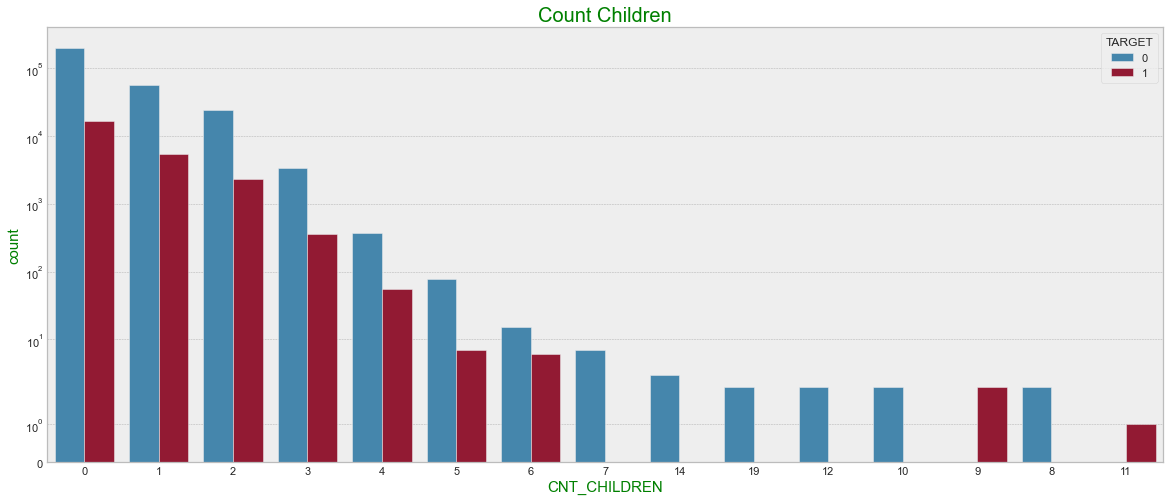

In [66]:
univariate_countplot('CNT_CHILDREN','Count Children', True, 0)

**`Insights from above plot`**
Most of the loan applicants having 0 to 2 children

Y in log scale


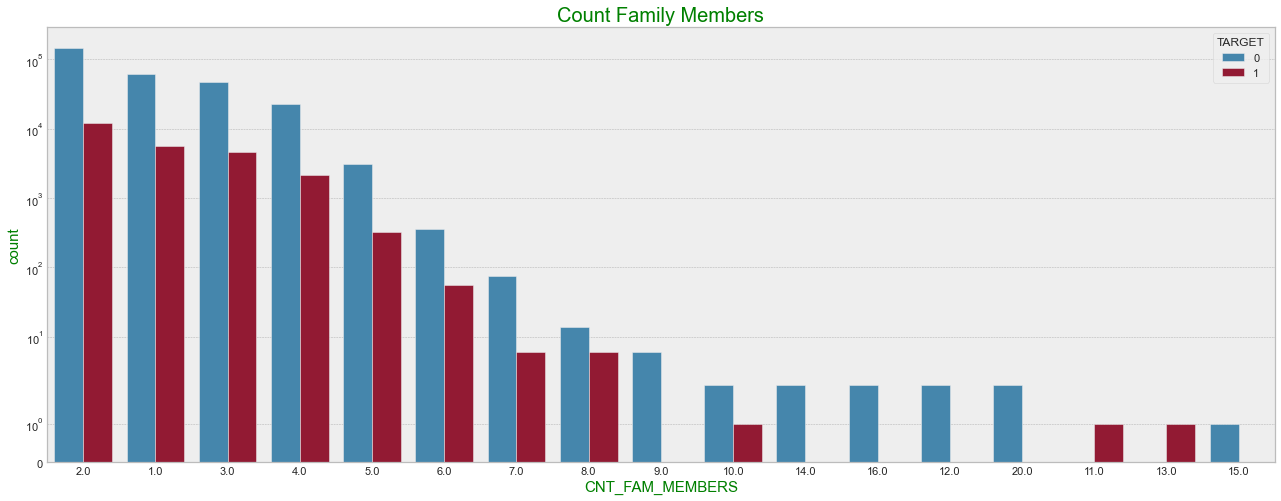

In [67]:
univariate_countplot('CNT_FAM_MEMBERS','Count Family Members', True, 0)

**`Insights from above plot`**
Most of the loan applicants comes from family of 2 members followed by 1 or 3

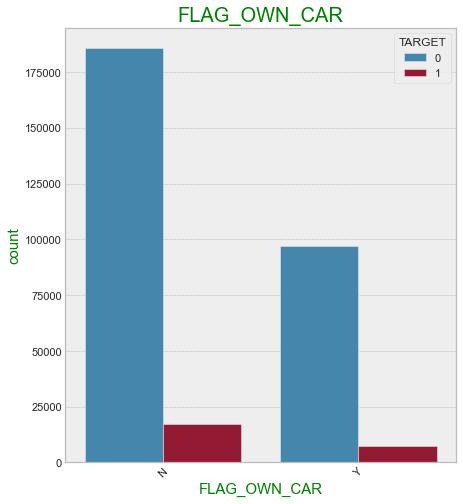

In [68]:
#univariate_box(df,'AMT_ANNUITY','AMT ANNUITY Distribution')
univariate_countplot('FLAG_OWN_CAR','FLAG_OWN_CAR', False, 45)


**`Insights from above plot`**
 People having not having own car tends to apply more for loan


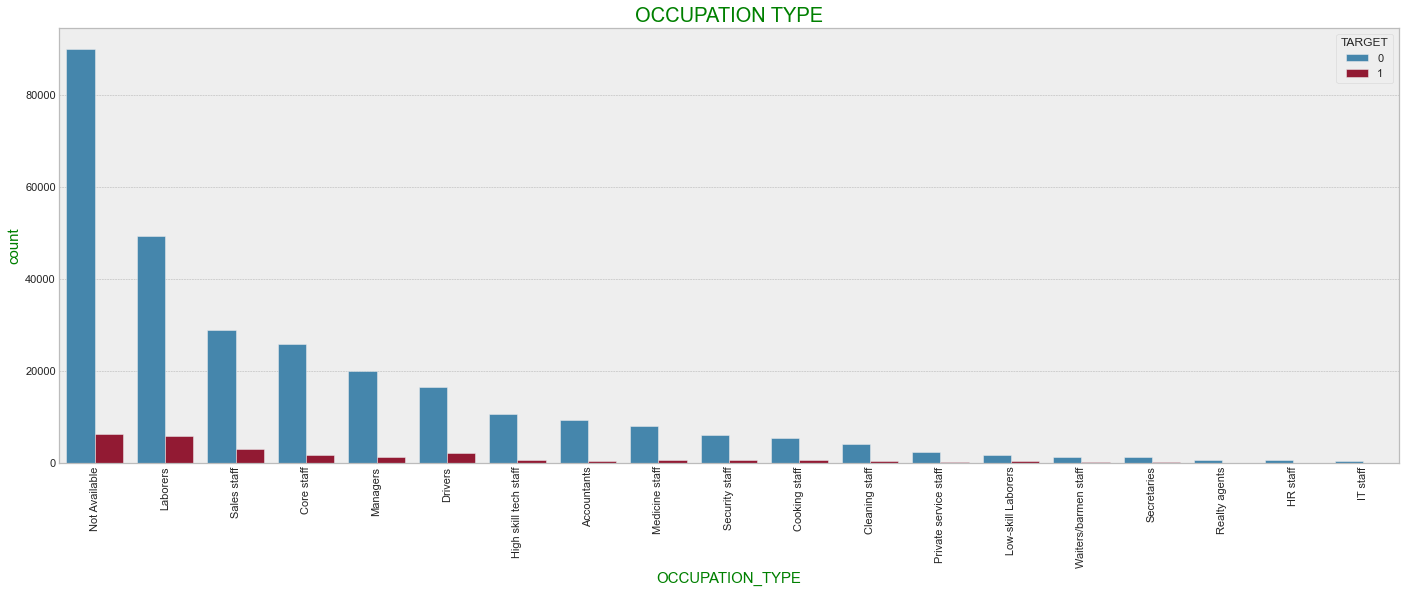

In [69]:
univariate_countplot('OCCUPATION_TYPE', 'OCCUPATION TYPE', False, 90)

**`Insights from above plot`**
Most of the loan taking clients are laborers followed by sales staff then core staff. 
IT staff and HR staff seems to take lowest amount of loans.

Y in log scale


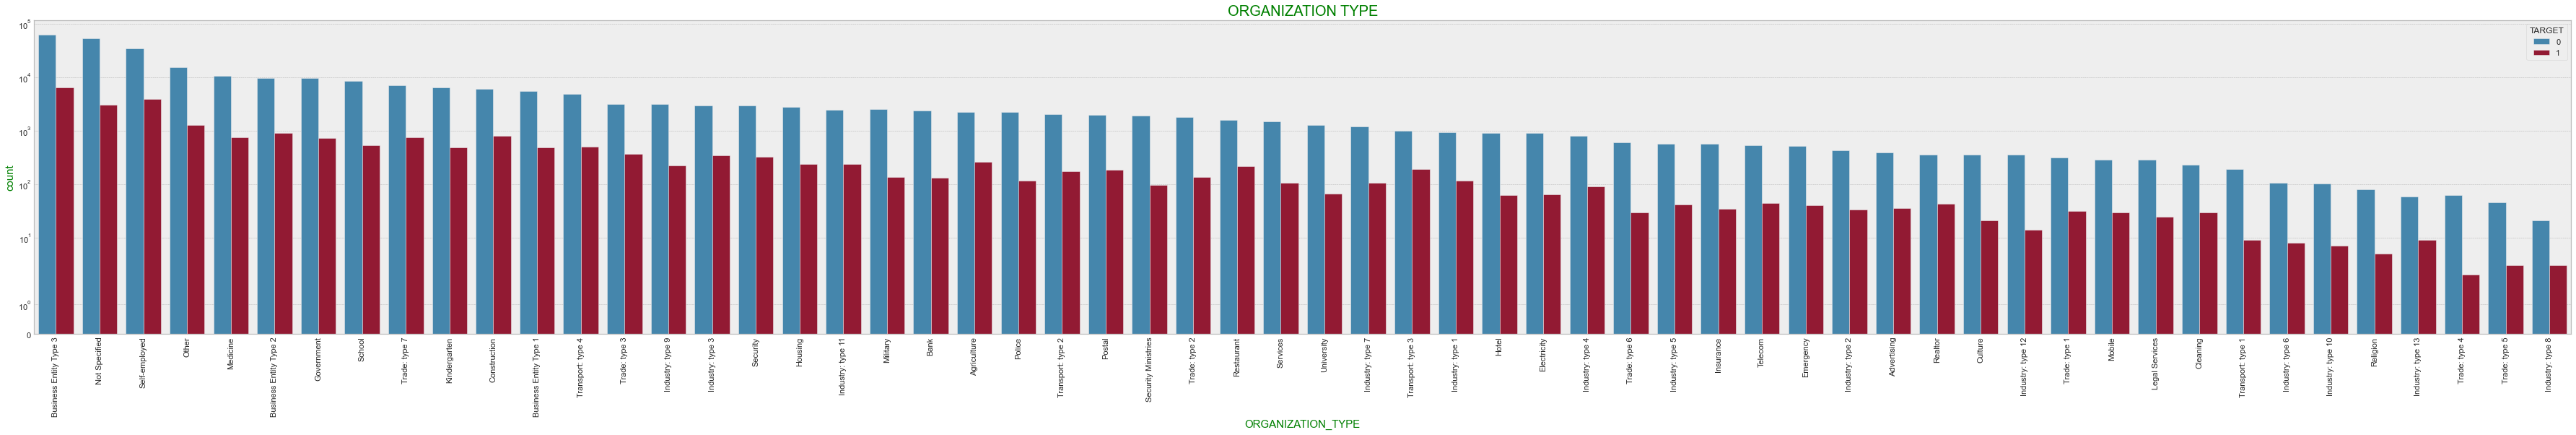

In [70]:
univariate_countplot('ORGANIZATION_TYPE', 'ORGANIZATION TYPE', True, 90)

**`Insights from above plot`**
1. Most of clients are from category Business Entity Type 3
2. Trade : type 4, Trade: type 5 seems to have relatively less defaulters.

## **`Bi/MultiVariate Analysis`**

#### Analysis for target variable 0 ( Non-Defaulter)

Y in log scale


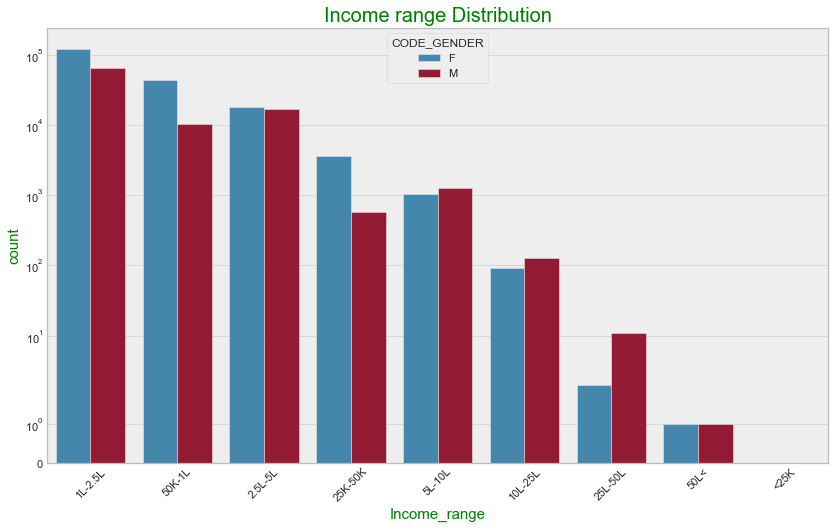

In [71]:
def bivariate_ana(df,x_axis,title,hue):
    width=len(df[x_axis].unique())+5
    plt.figure(figsize=[width,8])
    
    plt.title( title, fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
    x_axis1=x_axis.replace('_',' ')
    
    plt.xlabel(x_axis1,fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
    y_axis='Count of '+x_axis.replace('_',' ')+' in symetric log -->'
    plt.ylabel(y_axis,fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
    plt.xticks(rotation=45)
    sty=['bmh','seaborn-deep', 'seaborn-pastel', 'classic',  'seaborn-poster',  'tableau-colorblind10', 'seaborn-bright']
    np.random.shuffle(sty)  
    plt.style.use(sty[0])
    plt.yscale('symlog')
    print('Y in log scale')
    # bmh 'seaborn-deep', 'seaborn-pastel', 'classic',  'seaborn-poster',  'tableau-colorblind10', 'seaborn-bright'
    #print(sty[0])
    sns.countplot(data =df , x=x_axis,order=df[x_axis].value_counts().index,hue =hue) 
    #plt.show()
    
bivariate_ana(df_target0,'Income_range','Income range Distribution' ,'CODE_GENDER')    

##### Inference from the above plot
1. Maximum of customer have an income range of 25K to 5L
2. Females count is higher when compared to male in the income range of 25K to 5L
3. In higher Income bracket females counts is lower than the males

Y in log scale


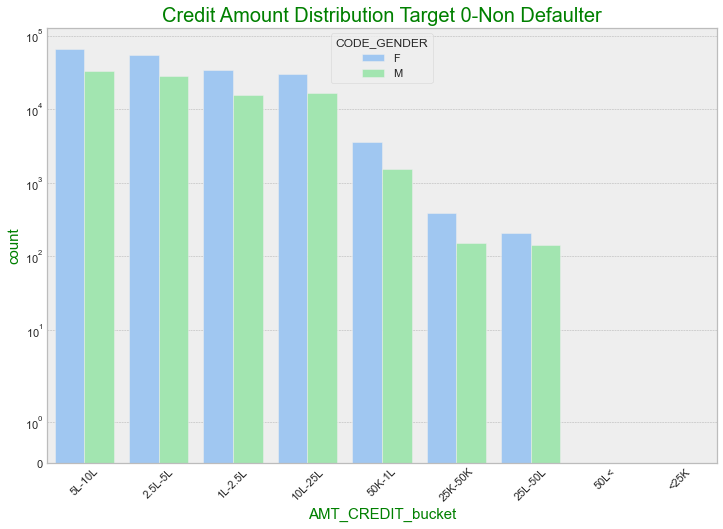

In [72]:
bivariate_ana(df_target0,'AMT_CREDIT_bucket','Credit Amount Distribution Target 0-Non Defaulter','CODE_GENDER') 

 ##### Inference from the above plot
 1. From the plot it is clear that females prefer credit more than males
 2. Credit bucket 5L-10L has the highest no of applicant 

Y in log scale


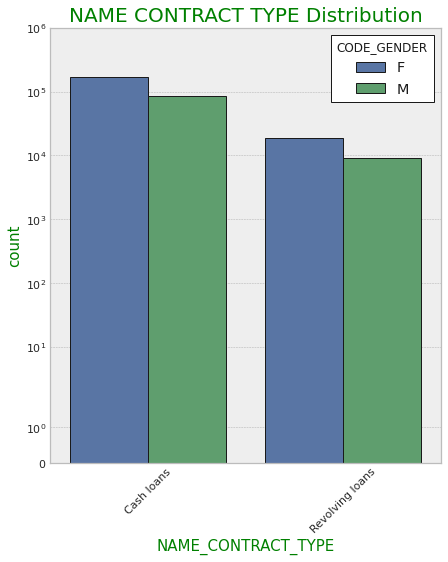

In [73]:

bivariate_ana(df_target0,'NAME_CONTRACT_TYPE','NAME CONTRACT TYPE Distribution','CODE_GENDER')

 ##### Inference from the above plot
 1. Cash loan is more popular than the Revolving loans
 2. Females count is higher in both the loan types

Y in log scale


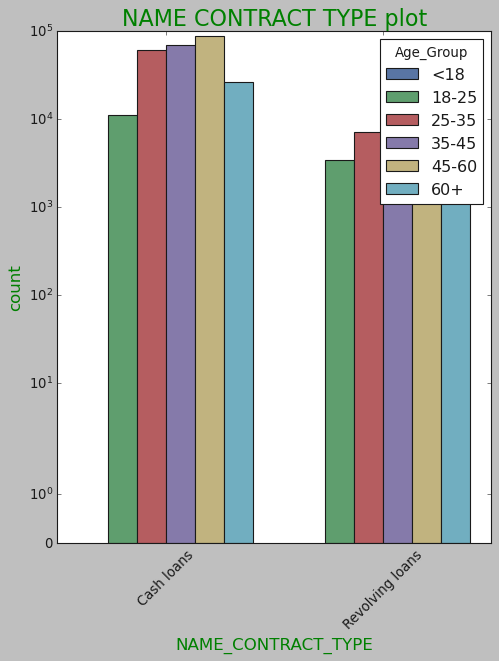

In [74]:
bivariate_ana(df_target0,'NAME_CONTRACT_TYPE','NAME CONTRACT TYPE plot','Age_Group')

##### Inference from the above plot
1. Cash loan is most preffered by customer in the age group of 45-60
2. Age group 18-25 have the least count in both the types    

Y in log scale


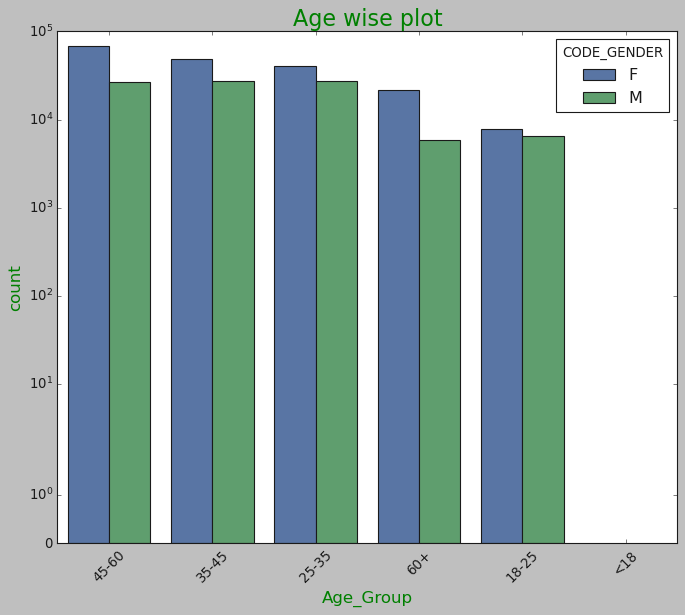

In [75]:
#df_target0.head()
bivariate_ana(df_target0,'Age_Group','Age wise plot','CODE_GENDER')

##### Inference from the above plot
1. Females of all age group have higher count of credit when compared to males
2. Age group 45-60 have the higher counts of credit in both the gender

In [76]:
df_target0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
1        1129500.0           Family    State servant   
2         135000.0    Unaccompanied          Working   
3         297000.0    Unaccompanied          Working   
4         513000.0    Unaccompanied          Working   
5         454500.0  Spouse, partner    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1                    0.003541       16765           1188            -1186.0   
2                    0.010032       19046            225            -4260.0   
3                    0.008019       19005           3039            -9833.0   
4                    0.028663       19932           3038            -4311.0   
5                    0.035792       16941           1588            -4970.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
1             -291      Core staff              2.0                     1   
2            -2531        Laborers              1.0                     2   
3            -2437        Laborers              2.0                     2   
4            -3458      Core staff              1.0                     2   
5             -477        Laborers              2.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   
5                            2                  WEDNESDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   
5                       16                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   
5                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0         

Y in log scale


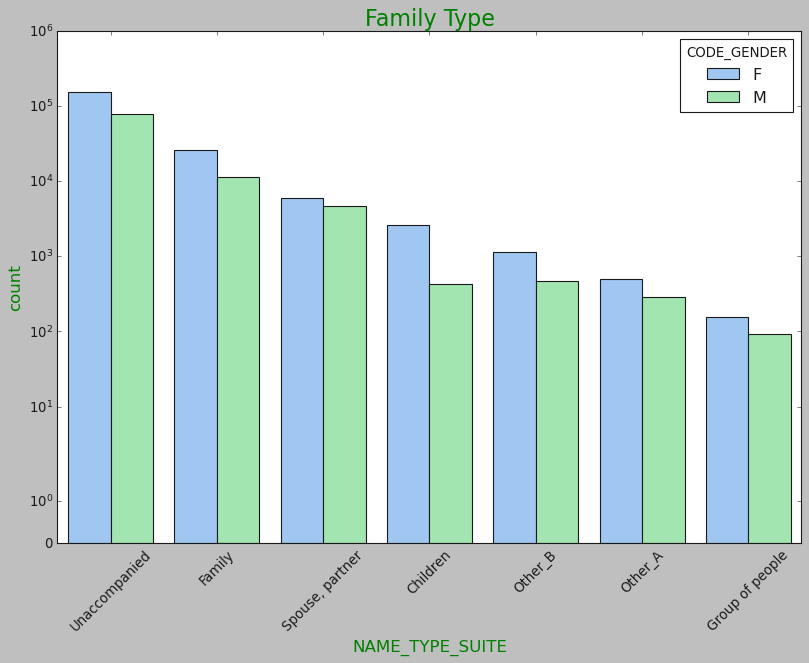

In [77]:
bivariate_ana(df_target0,'NAME_TYPE_SUITE','Family Type','CODE_GENDER')

##### Inference from the above plot
1. Unaccompanied male and female have the higher credit counts
2. Group of people have the least no of credits for both the gender

Y in log scale


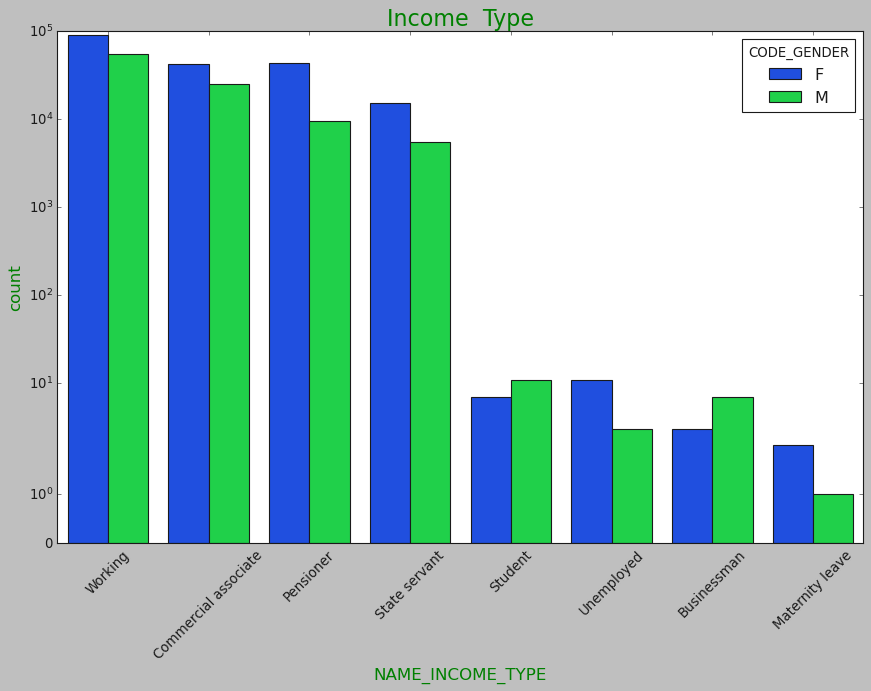

In [78]:
bivariate_ana(df_target0,'NAME_INCOME_TYPE','Income  Type','CODE_GENDER')

##### Inference from the above plot
1. Working, Commercial aaociate, Pensioner and sate servent have the higher credits.
2. Females credit count is higher for the above mentioned Income type.
3. Male Student have higher credit when compared to females

Y in log scale


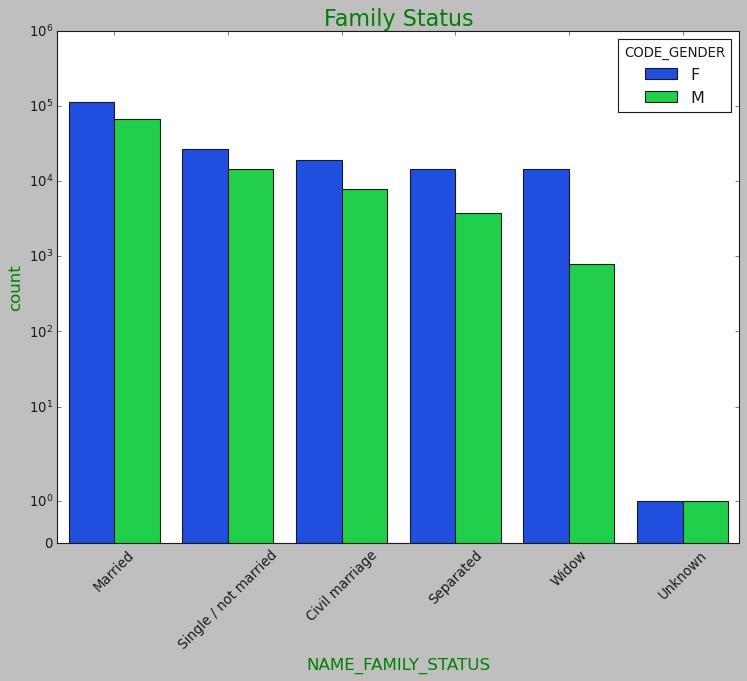

In [79]:
bivariate_ana(df_target0,'NAME_FAMILY_STATUS','Family Status','CODE_GENDER')

##### Inference from the above plot
1. Married customer have higher credit counts
2. Females of all Family status have higher credit counts when compared to males

Y in log scale


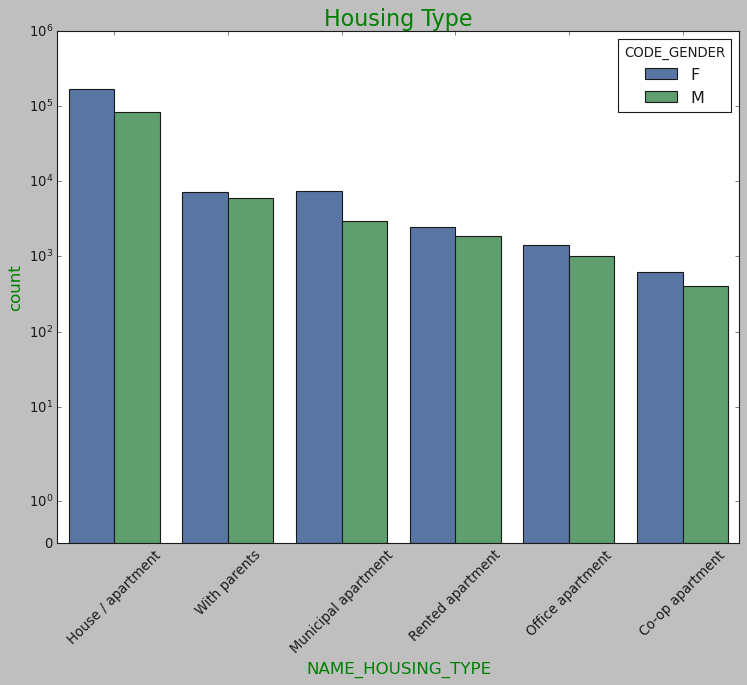

In [80]:
bivariate_ana(df_target0,'NAME_HOUSING_TYPE','Housing Type','CODE_GENDER') 

##### Inference from the above plot
1. Customer staying in House/ apartment have the highest credit count
2. Customer staying in Co-op appartment have the least credit count

X in log scale


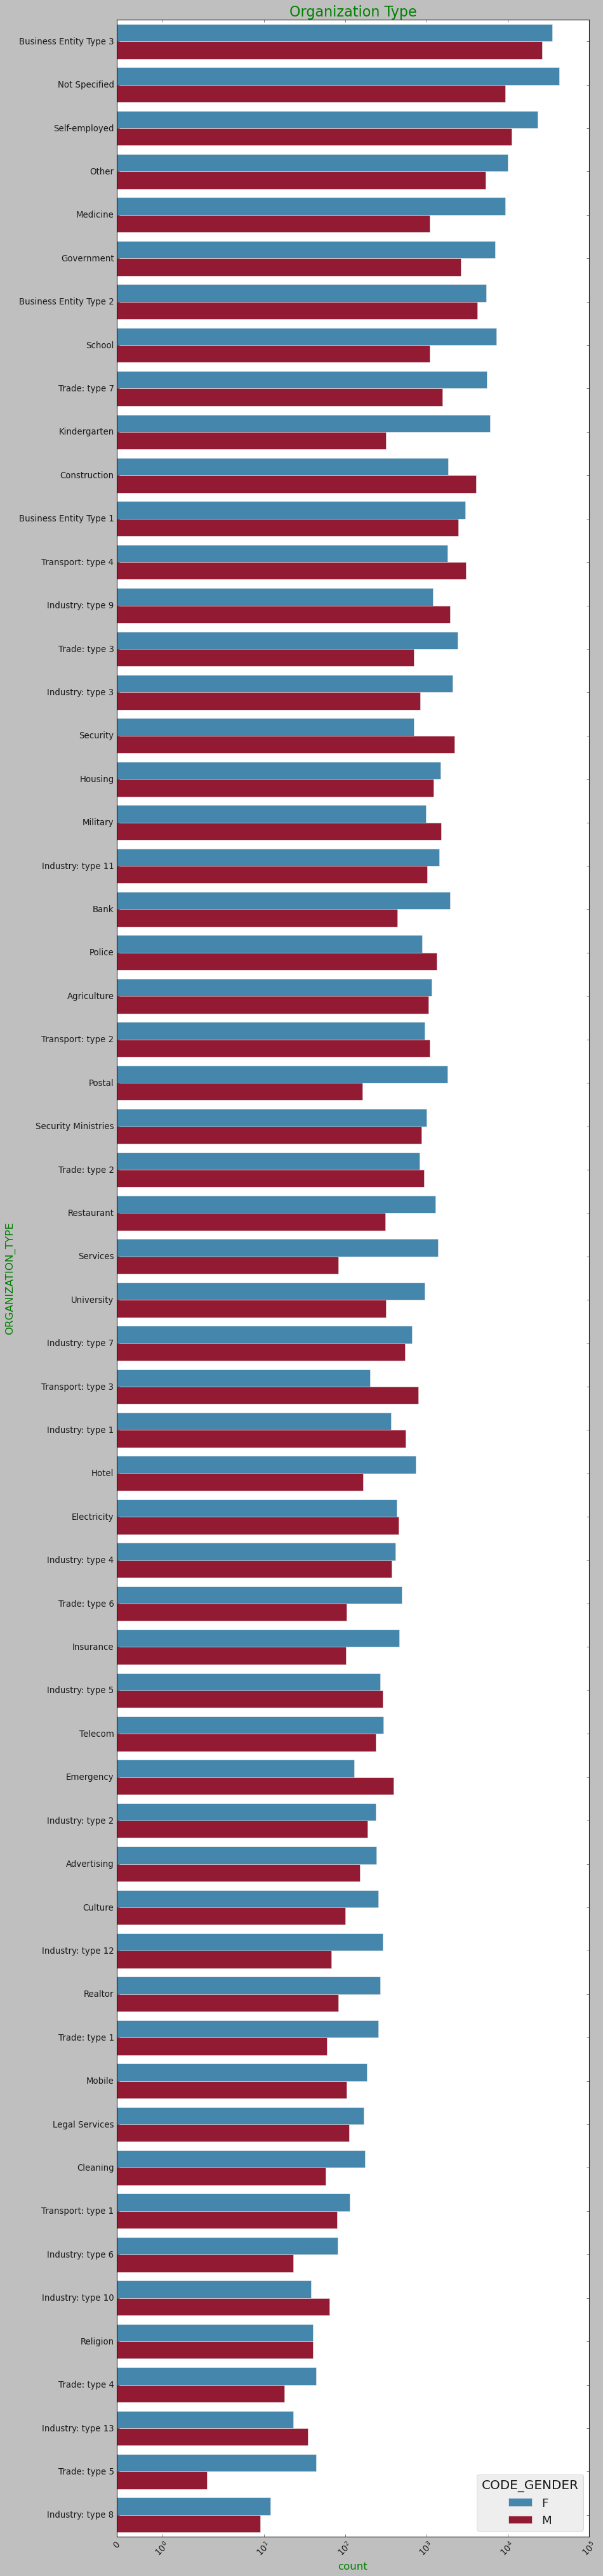

In [81]:
def bivariate_ana_y(df,x_axis,title,hue):
    height=len(df[x_axis].unique())+4
    plt.figure(figsize=[12,height])
    plt.title( title, fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
    plt.xlabel('Count',fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
    plt.ylabel( x_axis,fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
    plt.xticks(rotation=45)
    sns.set_context('talk')
    sty=['bmh','seaborn-deep', 'seaborn-pastel', 'classic',  'seaborn-poster',  'tableau-colorblind10', 'seaborn-bright']
    np.random.shuffle(sty)  
    plt.style.use(sty[0])
    plt.xscale('symlog')
    print('X in log scale')
    # bmh 'seaborn-deep', 'seaborn-pastel', 'classic',  'seaborn-poster',  'tableau-colorblind10', 'seaborn-bright'
    #print(sty[0])
    sns.countplot(data =df , y=x_axis, order=df[x_axis].value_counts().index, hue =hue) 
    plt.show()


bivariate_ana_y(df_target0,'ORGANIZATION_TYPE','Organization Type','CODE_GENDER')  

##### Inference from the aboce plot
1. Business Entity Type 3 have the highest credit for both male and female
2. Industry type 8,5,13 have the least credit count
3. Females have higher credit than males in all organization type with exception being ( Construction , Transport type 4, Industry type 9, Security, Milatary, Police, Transport type 2,trade type 2, transport type 3, industry type 1, Electricity,Industry type 5, Emergency, Industry type 10, Industry type 13 )


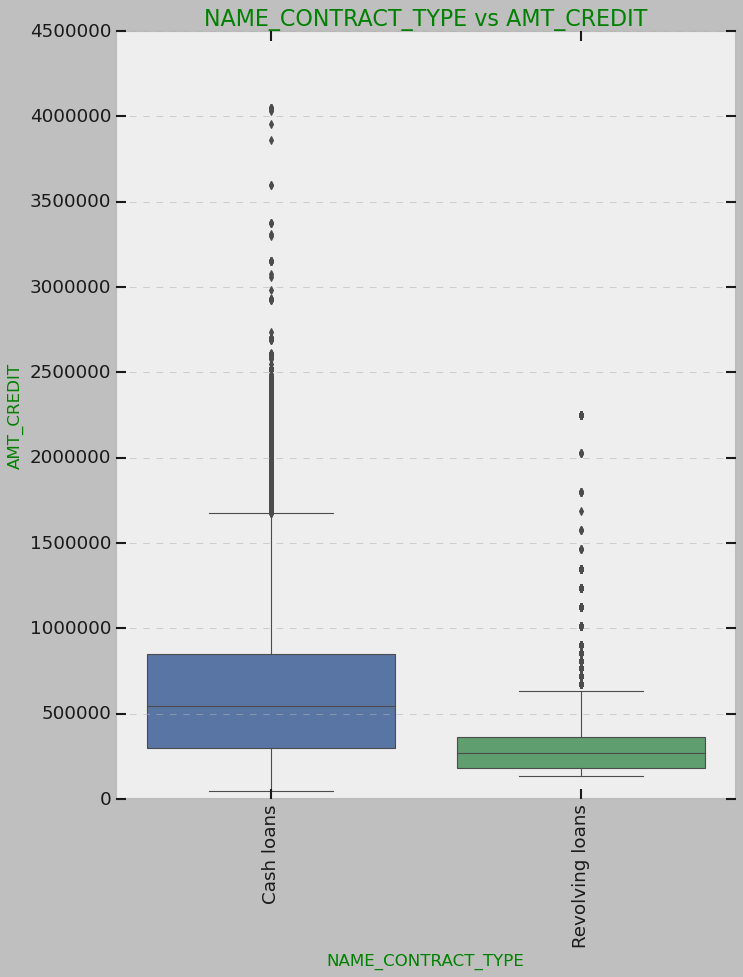

In [82]:
def box_plt(df,x_axis,y_axis,title):
    he=len(df[x_axis].unique())+4
    if he < 10:
        he=10
    else:
        he
    plt.figure(figsize=[he,12])
    plt.title( title, fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
    plt.xlabel(x_axis,fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
    plt.ylabel( y_axis,fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
    plt.xticks(rotation=90)
    sns.set_context('talk')
    sty=['bmh','seaborn-deep', 'seaborn-pastel', 'classic',  'seaborn-poster',  'tableau-colorblind10', 'seaborn-bright']
    np.random.shuffle(sty)  
    plt.style.use(sty[0])
    #plt.xscale('symlog')
    # bmh 'seaborn-deep', 'seaborn-pastel', 'classic',  'seaborn-poster',  'tableau-colorblind10', 'seaborn-bright'
    #print(sty[0])  
   
    #plt.title('NAME_CONTRACT_TYPE vs AMT_CREDIT')
    sns.boxplot(data=df, x=x_axis,y=y_axis)
    plt.show()
box_plt(df_target0,'NAME_CONTRACT_TYPE','AMT_CREDIT','NAME_CONTRACT_TYPE vs AMT_CREDIT')    

#### Inference from the above plot
1. Median of cash loan is higher than the Revolving loans
2. Outliers Exist in both the loan types
3. In Cash loan we can observe the Outliers are continous upto 25L where as it is not continois in Revolving loan type

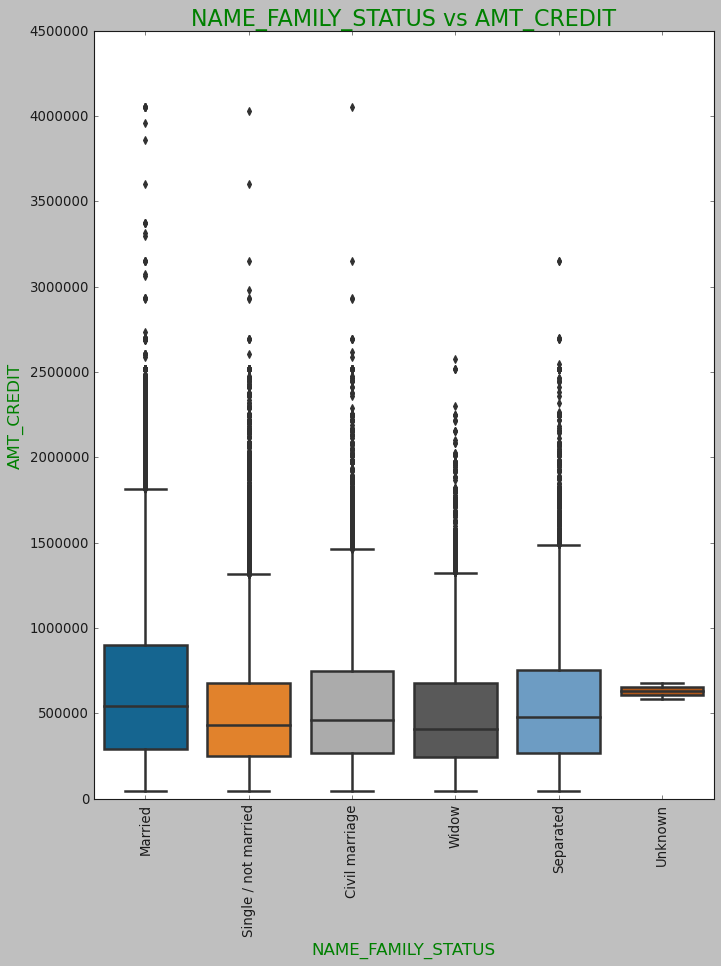

In [83]:
box_plt(df_target0,'NAME_FAMILY_STATUS','AMT_CREDIT','NAME_FAMILY_STATUS vs AMT_CREDIT')  

##### Inference from the above plot
1. Median of Married Customers is higher than any other Family status
2. Widow customer have the least credit median.
3. Outliers are present in all family status. It is continous for Married Customer upto 25L

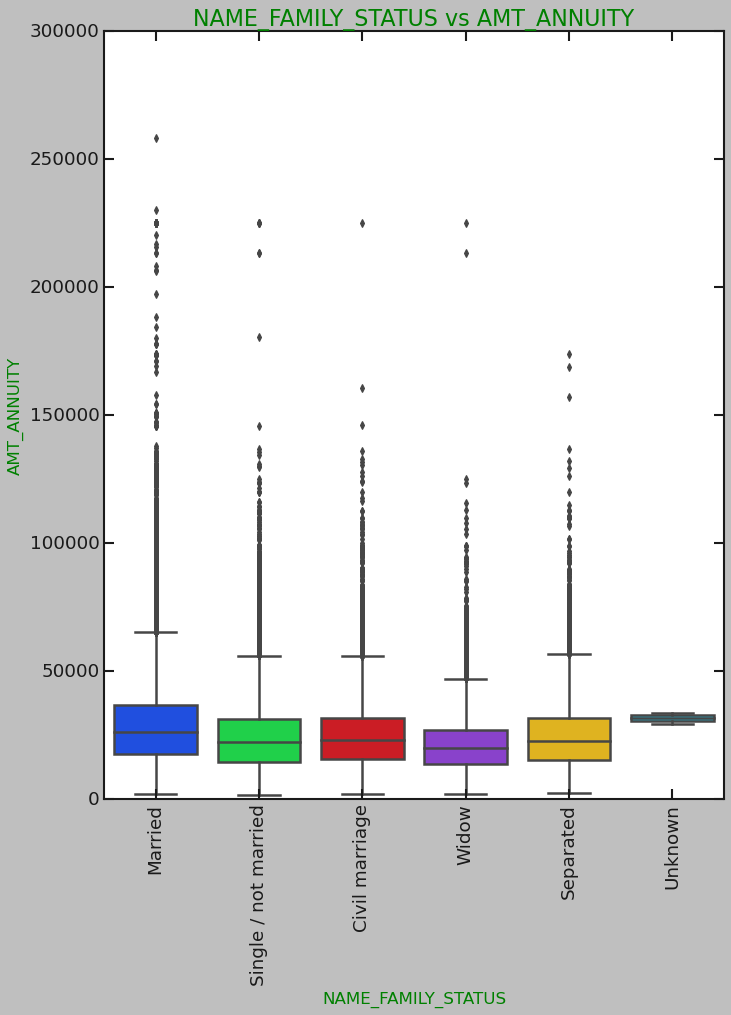

In [84]:
box_plt(df_target0,'NAME_FAMILY_STATUS','AMT_ANNUITY','NAME_FAMILY_STATUS vs AMT_ANNUITY') 

##### Inference from the above plot
1. Median and 3rd quartile for Married Customer have the highest annuity amt
2. Median of Widow Customer have the least annuity amt

In [85]:
corr_columns=['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','Age','Employment In Years']

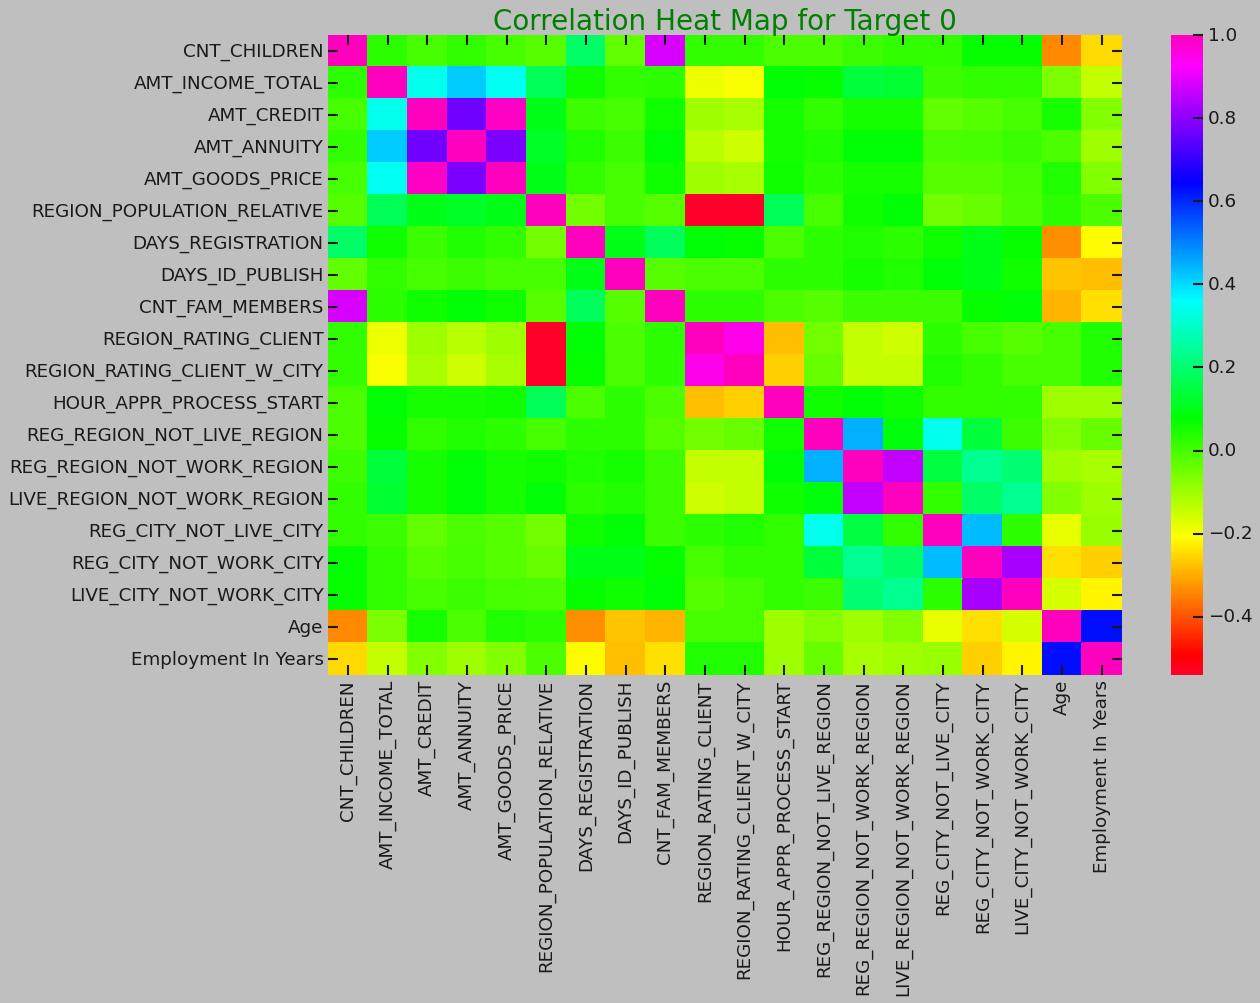

In [86]:
corr_df=df_target0[corr_columns].corr()
corr_df_1=corr_df.where(np.triu(np.ones(corr_df.shape),k=1).astype(np.bool))
corr_df_1=corr_df_1.unstack().reset_index()
corr_df_1.columns=['Var1','Var2','Correlation']
corr_df_1.dropna(subset=['Correlation'],inplace=True)
corr_df_1=corr_df_1.reset_index()
plt.figure(figsize=[16,10])
plt.title('Correlation Heat Map for Target 0', fontdict={'fontsize': 25, 'fontweight' : 20, 'color' : 'Green'})
sns.heatmap(corr_df.round(2),annot=False,cmap='gist_rainbow')
plt.show()
corr_df_1=corr_df_1.sort_values(by='Correlation',ascending=False)



##### Inference from the above plot
1. Income amt is directly related to AMT_ANNUITY,AMT_GOODS_PRICE and AMT_CREDIT ,customer with higher income have higher credit,investment and spending capacity
2. REGION_POPULATION_RELATIVE is inversely related with REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY,
    which implies customer with high region rating lives in less populated areas
3. Age and employment years of a customer are directly corelated as and when the customer age increases its employment age also increase
4. REG_CITY_NOT_LIVE_CITY and REG_CITY_NOT_WORK_CITY are directly corelated which implies customer with different permanent address have same live loaction and work location



#### Analysis for target variable 1 ( Defaulter)

Y in log scale


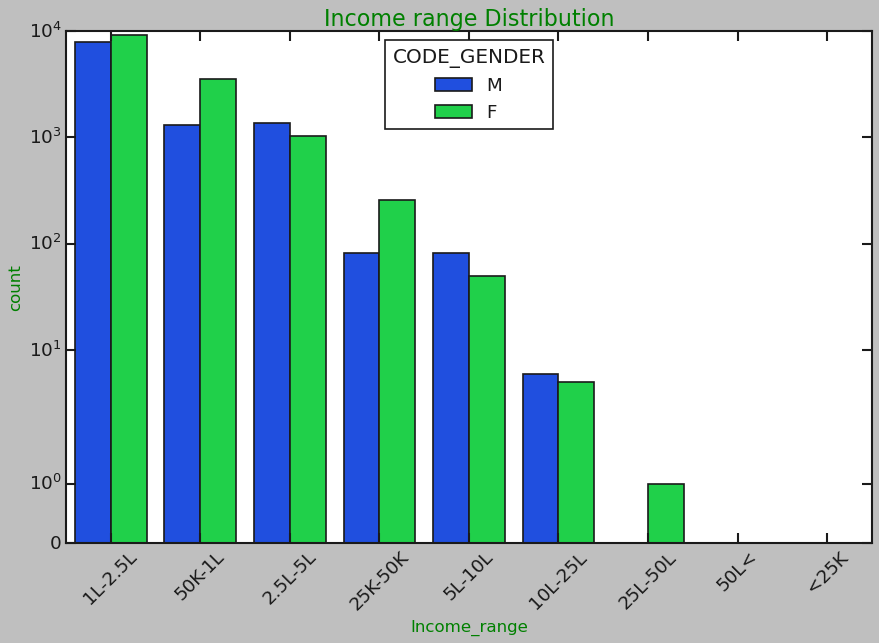

In [87]:
bivariate_ana(df_target1,'Income_range','Income range Distribution','CODE_GENDER')

##### Inference from the above plot
1. Income range count for female is higher in the 25k to 2.5L
2. Income range count for males are higher in the range from 2.5L to 25L
3. In the come bucket 25L -50 L there are no male Defaulter

Y in log scale


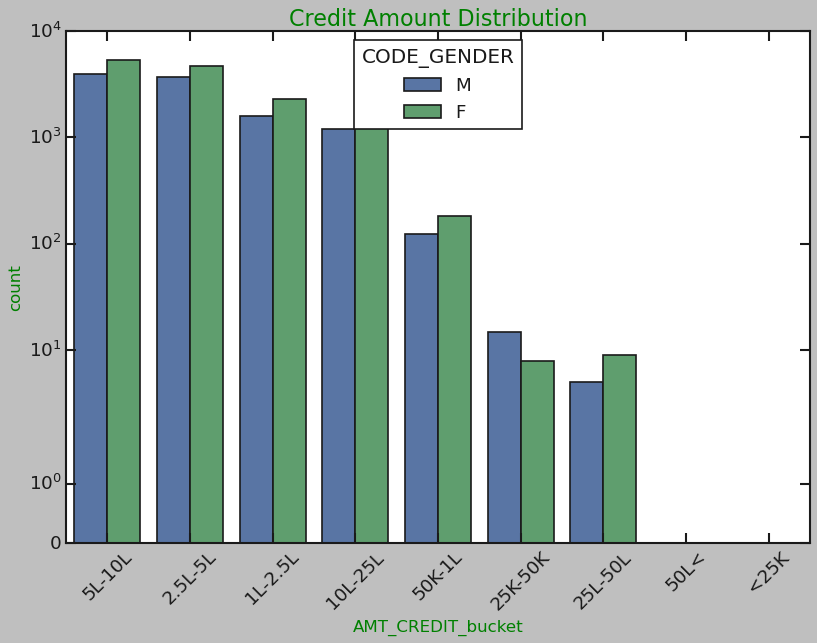

In [88]:
bivariate_ana(df_target1,'AMT_CREDIT_bucket','Credit Amount Distribution','CODE_GENDER') 

##### Inference from the above plot
1. Credit count is higher for males in the lower bracket  25K to 50K
2. In all other bucket Credit count of females is higher than the males
3. Credit Range of 5L-10L has the highest number of credit defaulter

Y in log scale


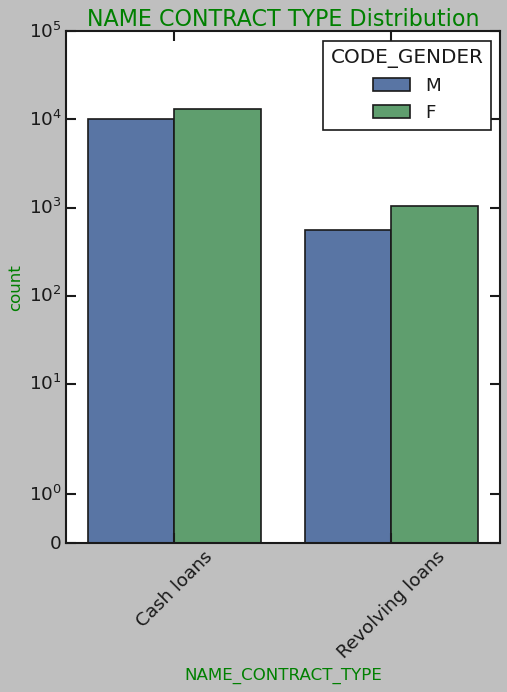

In [89]:
bivariate_ana(df_target1,'NAME_CONTRACT_TYPE','NAME CONTRACT TYPE Distribution','CODE_GENDER')

##### Inference from the above plot
1. Cash loan has highest number of defaulter then Revolving loans
2. Count of females Defaulter are highest in both the contract type

Y in log scale


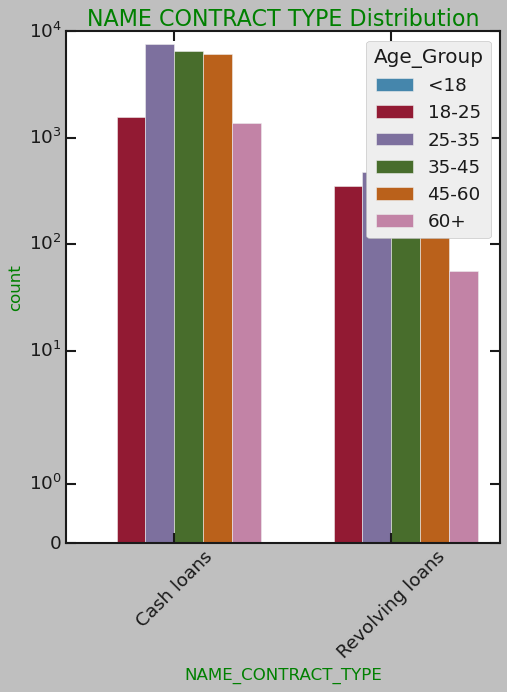

In [90]:
bivariate_ana(df_target1,'NAME_CONTRACT_TYPE','NAME CONTRACT TYPE Distribution','Age_Group')

###### Inference from the above plot
1. Age Group 25-35 have the highest defaulter Cash Loan Category
2. Age group 60+ have the least no of defaulters

Y in log scale


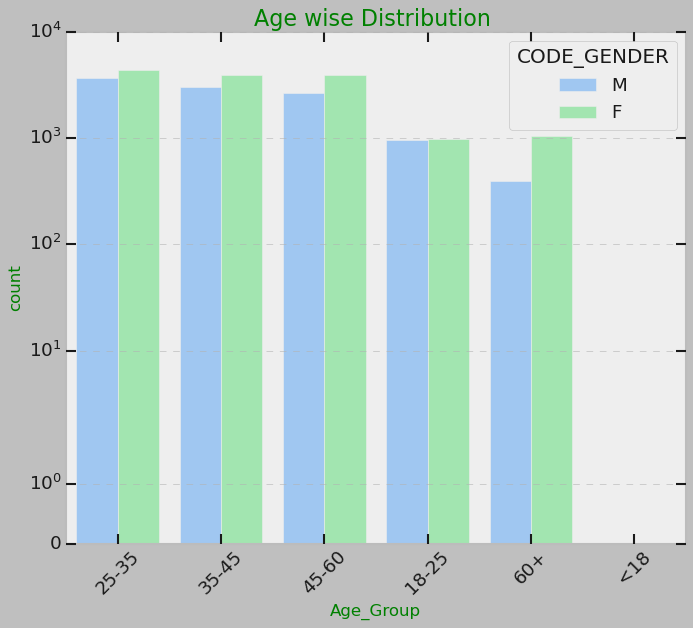

In [91]:
bivariate_ana(df_target1,'Age_Group','Age wise Distribution ','CODE_GENDER')

###### Inference from the above plot
1. Females defaulter are more than the males defaulter across all age group
2. Age Group 25-35 has the highest number of defaulters

Y in log scale


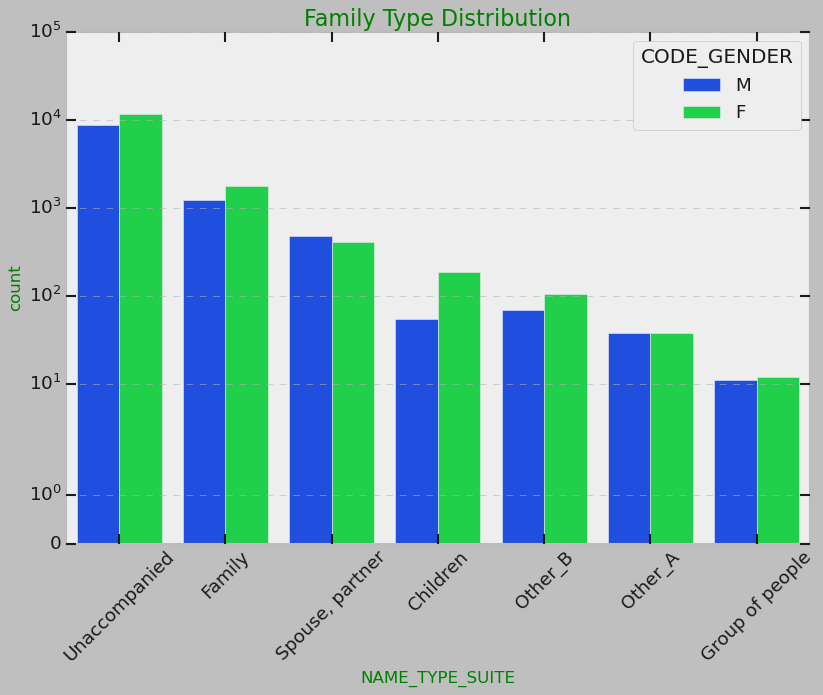

In [92]:
bivariate_ana(df_target1,'NAME_TYPE_SUITE','Family Type Distribution','CODE_GENDER')

##### Inference from the above plot
1. Unaccompanied customer have the highest no of Defaulter
2. Group of people have the least no of defaulter


Y in log scale


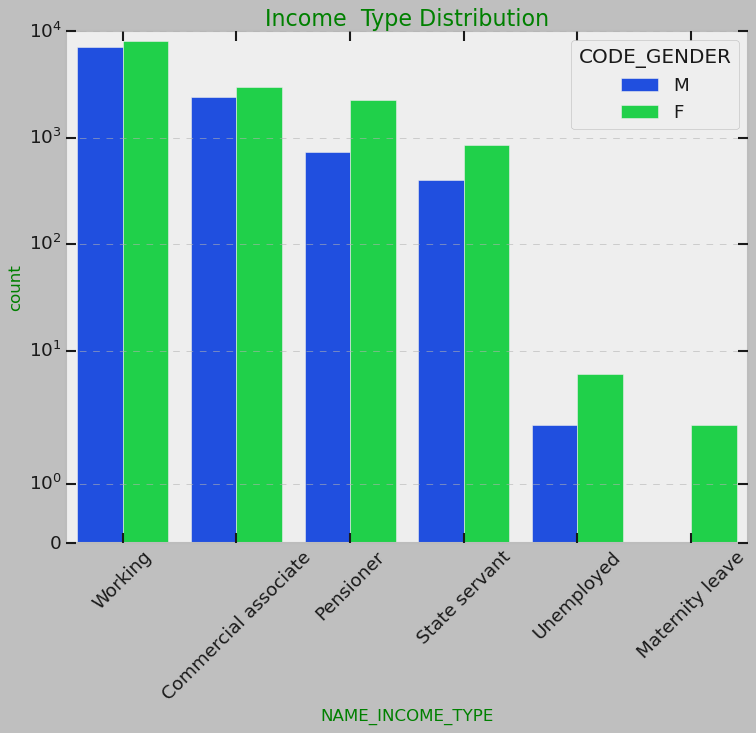

In [93]:
bivariate_ana(df_target1,'NAME_INCOME_TYPE','Income  Type Distribution','CODE_GENDER')

###### Inference from the above plot
1. Females defaulter are higher than the male deafulter of all income type

Y in log scale


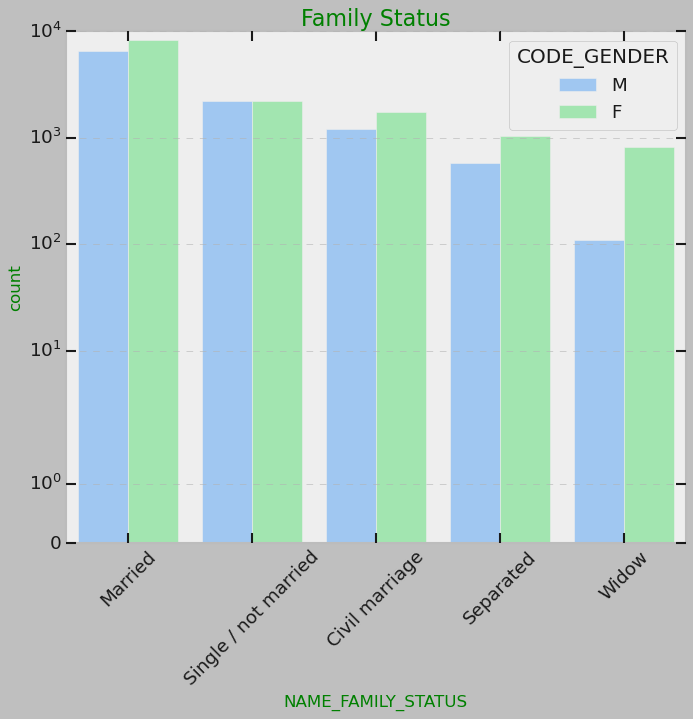

In [94]:
bivariate_ana(df_target1,'NAME_FAMILY_STATUS','Family Status','CODE_GENDER')

###### Inference from above plot
1. Married customer are the highest defaulter whereas widow customer are the least
2. Females of all Family Status are the highest defaulter when compared to males.
3. Count of Single Male and females defaulter are almost equal

Y in log scale


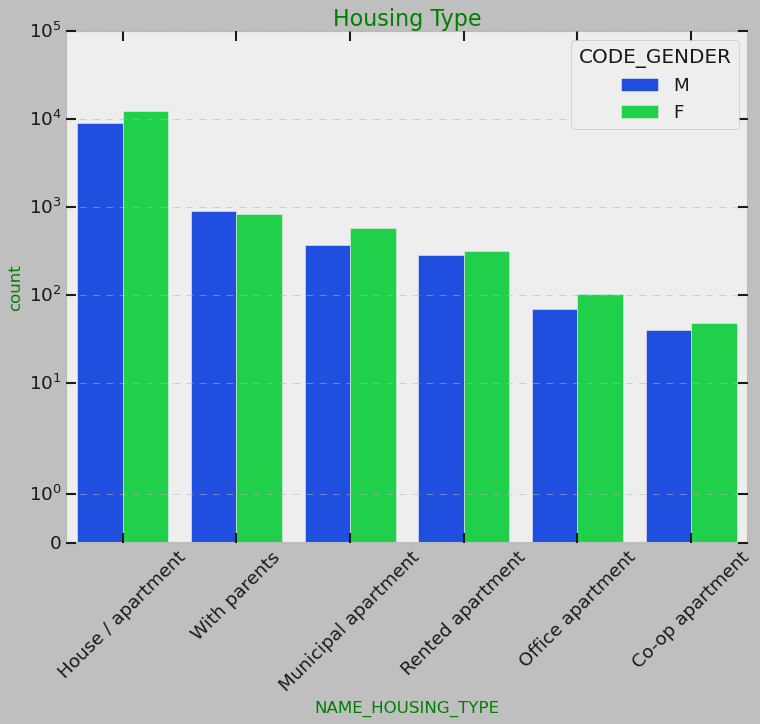

In [95]:
bivariate_ana(df_target1,'NAME_HOUSING_TYPE','Housing Type','CODE_GENDER') 

###### Inference from the above plot
1. House/ Apartment have highest defaulter whereas Co-op apartment are the least.
2. Males staying with parents have lower defaulter count than females
3. Females are the highest Defaulter for all other groups

X in log scale


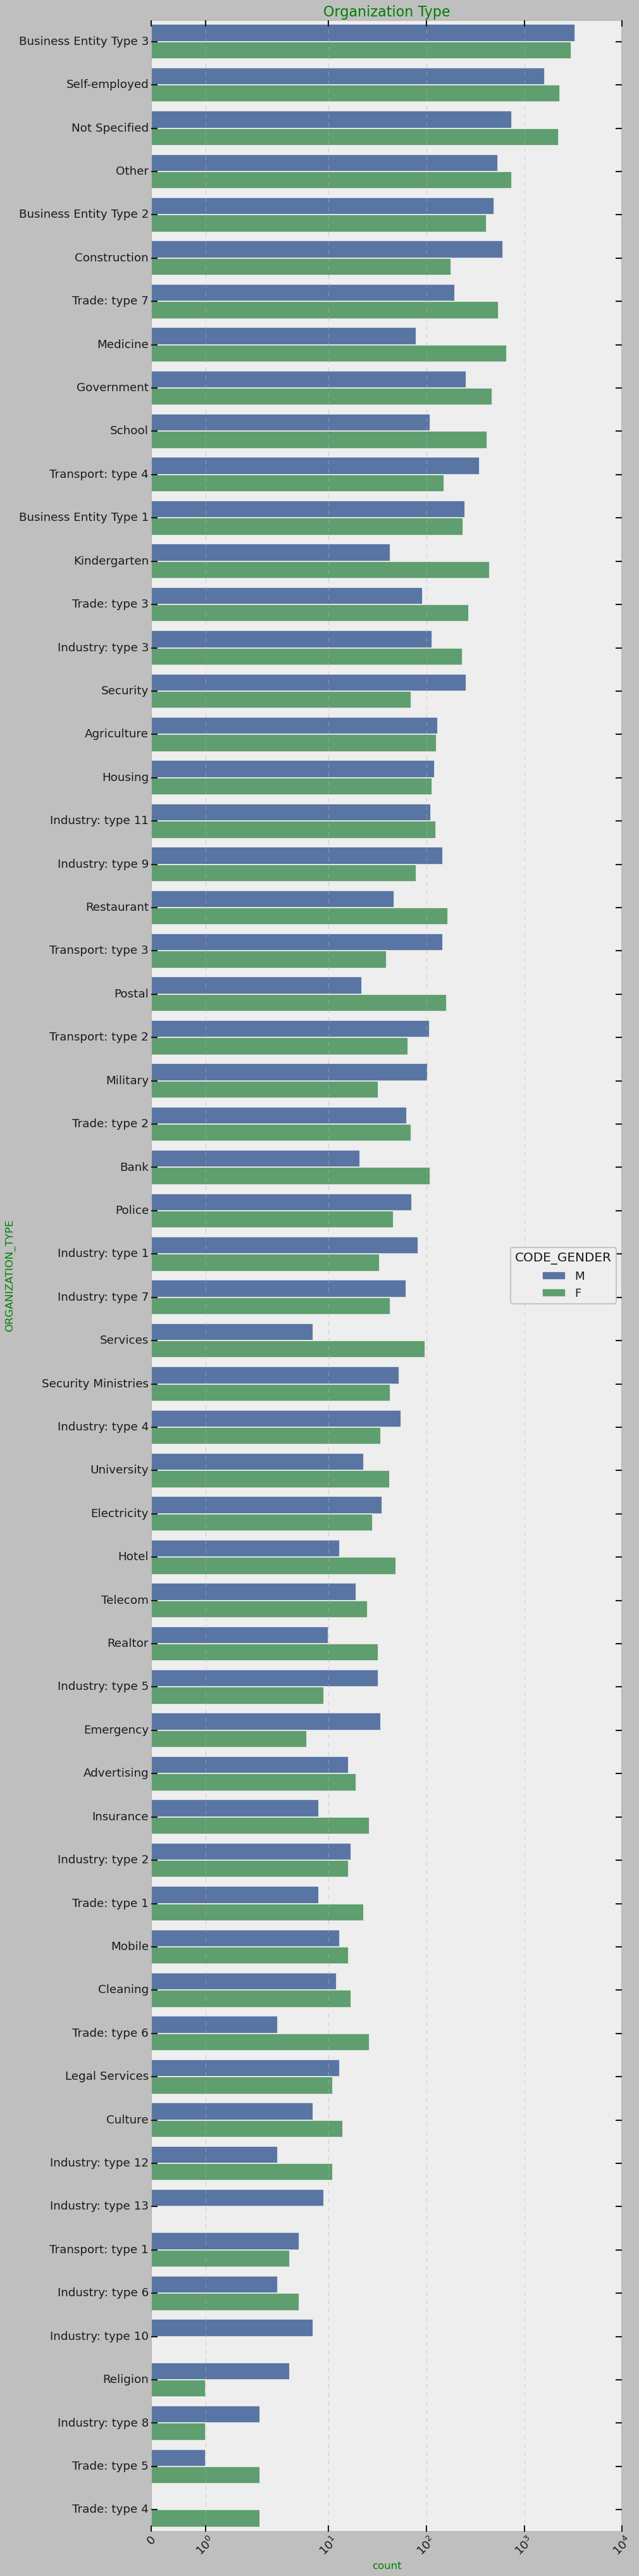

In [96]:
bivariate_ana_y(df_target1,'ORGANIZATION_TYPE','Organization Type','CODE_GENDER')

###### Inference from the above plot
1. Business Entity Type 3 hase highset number of defaulters for both the genders
2. There are no male Defaulter in Trade Type 4 Organization
3. There are no female Defaulter in Industry type 10 and industry type 13

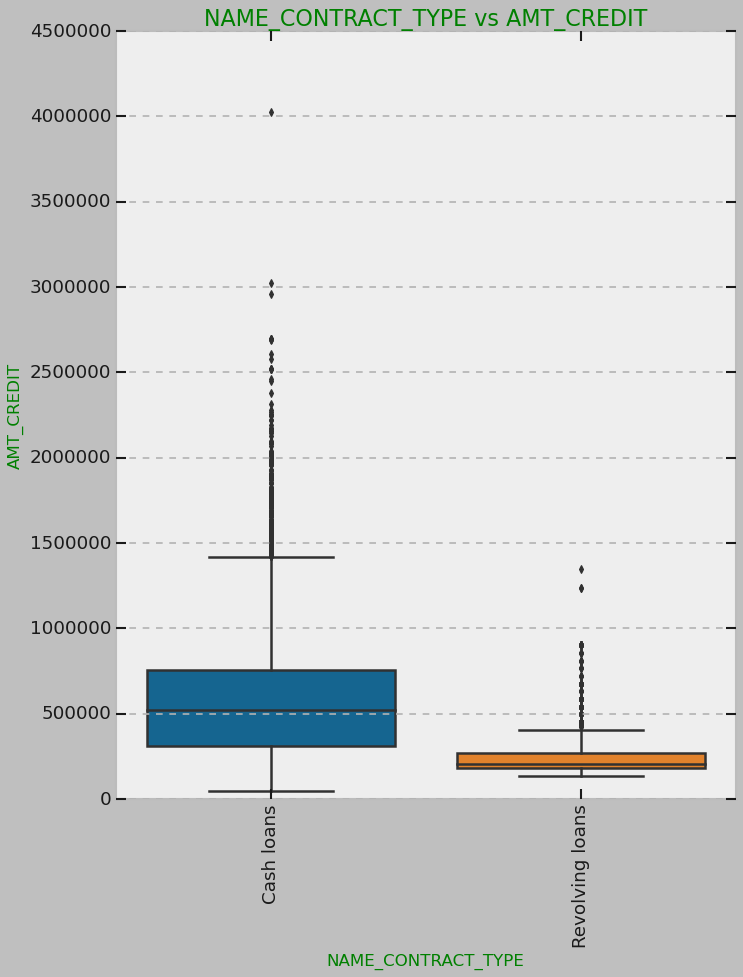

In [97]:
box_plt(df_target1,'NAME_CONTRACT_TYPE','AMT_CREDIT','NAME_CONTRACT_TYPE vs AMT_CREDIT') 

#### Inference from the Above plot
1. Median of the Cash loan is higher than the 100 Percentile of Revolving Loans
2. there are Outliers in both the loan type

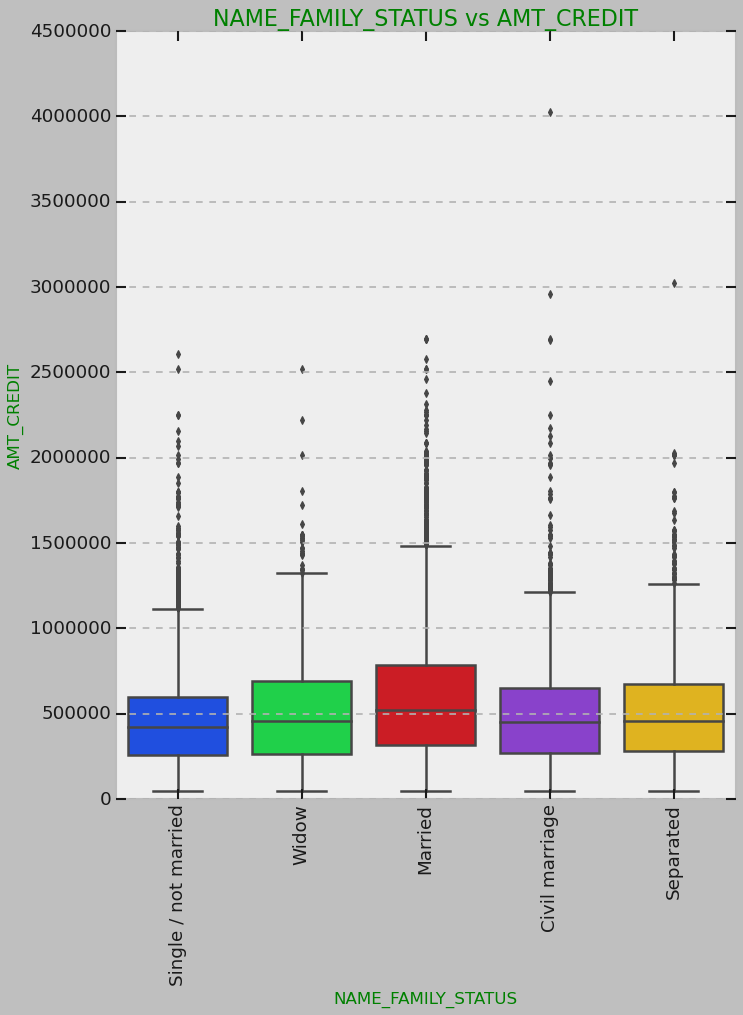

In [98]:
box_plt(df_target1,'NAME_FAMILY_STATUS','AMT_CREDIT','NAME_FAMILY_STATUS vs AMT_CREDIT')  

##### Inference from the above plot
1. Married Customer Defaulter have the highest mean than any other Family status
2. There are Outliers in Credit Amount PRV for all Family status type

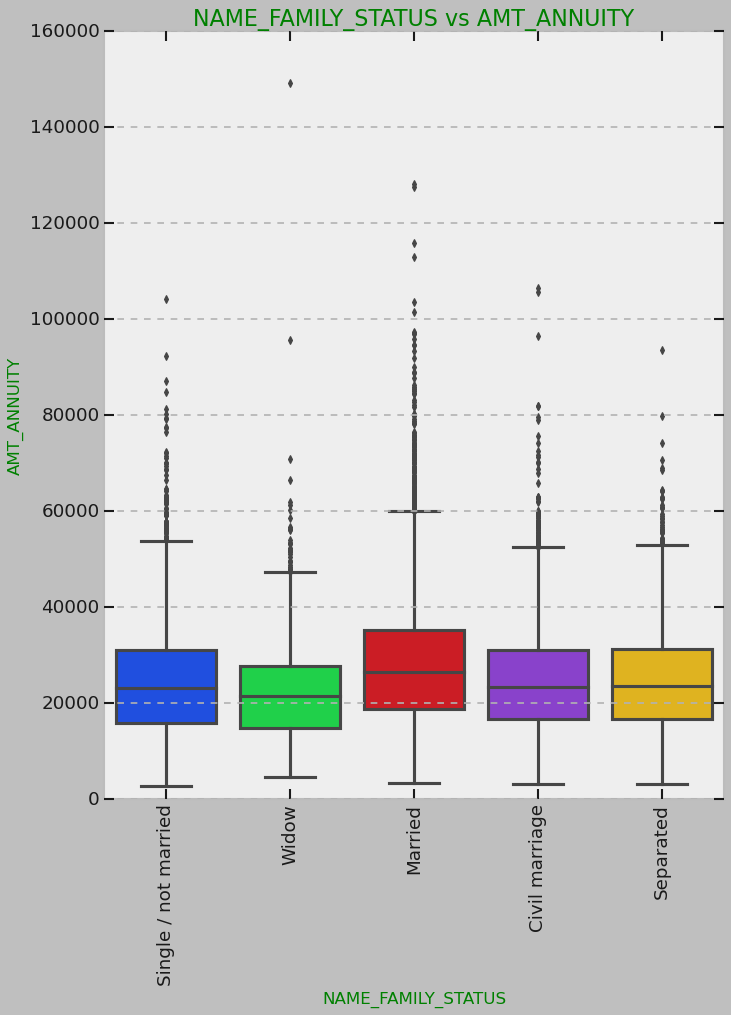

In [99]:
box_plt(df_target1,'NAME_FAMILY_STATUS','AMT_ANNUITY','NAME_FAMILY_STATUS vs AMT_ANNUITY')

##### Inference from the above plot
1. Married Customer Defaulter have the highest amt annuity median.
2. Widow Customer Defaulter have the least amt annuity median.
3. There are outlier in all the Family status type

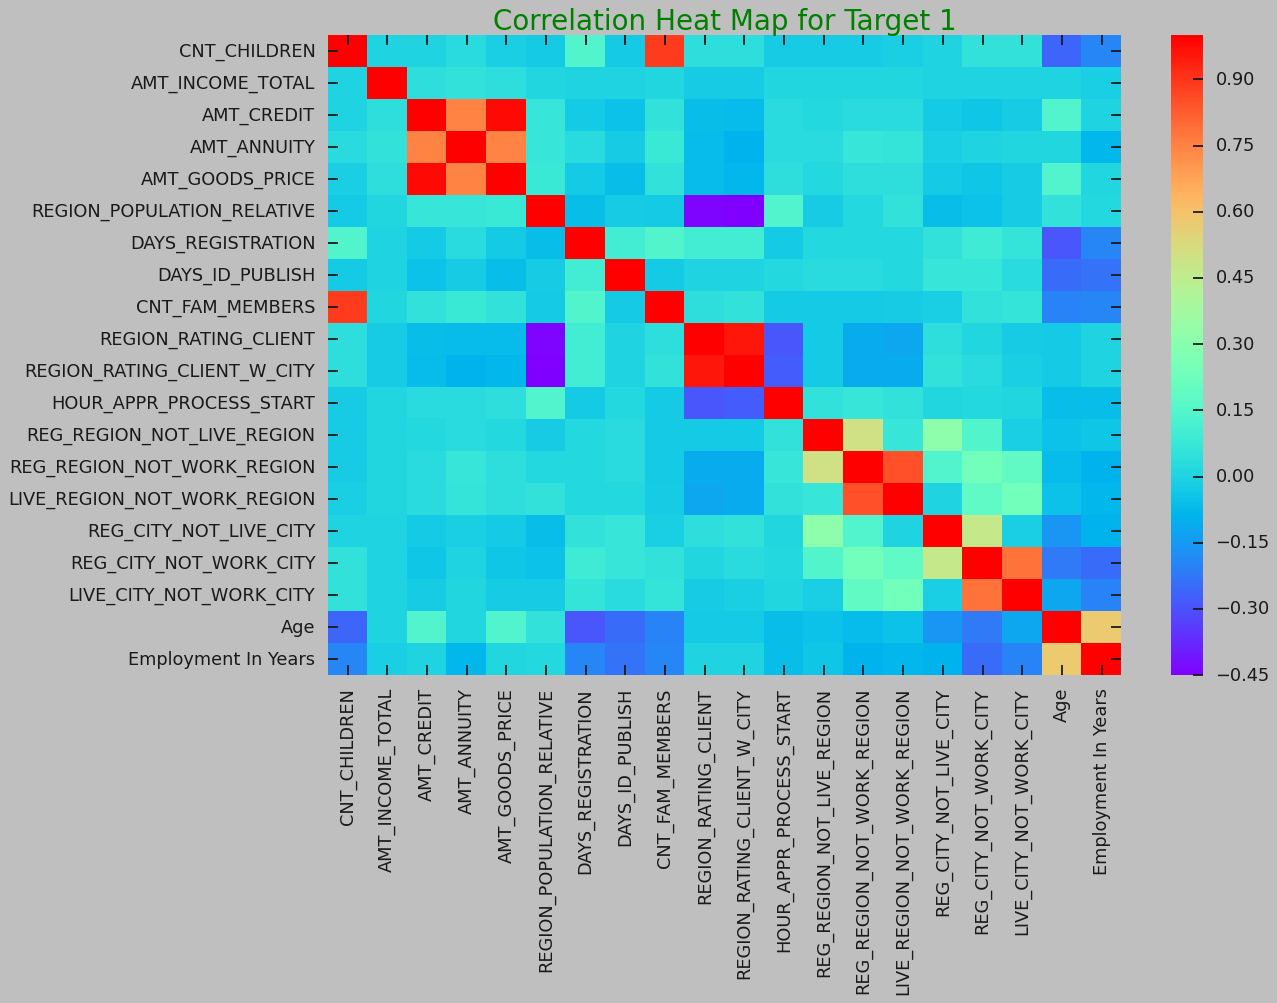

In [100]:
corr_df=df_target1[corr_columns].corr()
corr_df_1=corr_df.where(np.triu(np.ones(corr_df.shape),k=1).astype(np.bool))
corr_df_1=corr_df_1.unstack().reset_index()
corr_df_1.columns=['Var1','Var2','Correlation']
corr_df_1.dropna(subset=['Correlation'],inplace=True)
corr_df_1=corr_df_1.reset_index()
plt.figure(figsize=[16,10])
plt.title('Correlation Heat Map for Target 1', fontdict={'fontsize': 25, 'fontweight' : 20, 'color' : 'Green'})
sns.heatmap(corr_df.round(2),annot=False,cmap='rainbow')
plt.show()
corr_df_1=corr_df_1.sort_values(by='Correlation',ascending=False)

##### Inference from the above plot
1. Income amt is directly related to AMT_ANNUITY,AMT_GOODS_PRICE and AMT_CREDIT ,customer with higher income have higher credit,investment and spending capacity
2. REGION_POPULATION_RELATIVE is inversely related with REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY,
    which implies customer with high region rating lives in less populated areas
3. Age and employment years of a customer are directly corelated as and when the customer age increases its employment age also increase
4. REG_CITY_NOT_LIVE_CITY and REG_CITY_NOT_WORK_CITY are directly corelated which implies customer with different permanent address have same live loaction and work location
5. Corelation for both defaulter and non defalter are simillar.

### Analysis for Customer facing payment difficulties

#### Read the data fromprevious application file

In [101]:
df_prv=pd.read_csv('previous_application.csv')

In [102]:
# Check the shape
df_prv.shape

(1670214, 37)

In [103]:

df_prv.info(True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [104]:
###Deleting columns with more than 50% null values
df_del_col=df_prv.columns[df_prv.isnull().sum()/df_prv.shape[0] >=0.5]
df_prv.drop(df_del_col,inplace=True,axis=1)
print(df_del_col)


Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED'],
      dtype='object')


In [105]:
## Analyzing the variable in the DataFrame
dict_unique_rec=dict(df_prv.nunique().sort_values())
print('Column_name No_of_unique_records unique_values column_data_type')
for i,j in dict_unique_rec.items():
    if j <= 100:
        print(i,j,df_prv[i].unique(),df_prv[i].dtype)

Column_name No_of_unique_records unique_values column_data_type
NFLAG_INSURED_ON_APPROVAL 2 [ 0.  1. nan] float64
NFLAG_LAST_APPL_IN_DAY 2 [1 0] int64
FLAG_LAST_APPL_PER_CONTRACT 2 ['Y' 'N'] object
NAME_PRODUCT_TYPE 3 ['XNA' 'x-sell' 'walk-in'] object
NAME_CONTRACT_TYPE 4 ['Consumer loans' 'Cash loans' 'Revolving loans' 'XNA'] object
NAME_CLIENT_TYPE 4 ['Repeater' 'New' 'Refreshed' 'XNA'] object
NAME_PAYMENT_TYPE 4 ['Cash through the bank' 'XNA' 'Non-cash from your account'
 'Cashless from the account of the employer'] object
NAME_CONTRACT_STATUS 4 ['Approved' 'Refused' 'Canceled' 'Unused offer'] object
NAME_YIELD_GROUP 5 ['middle' 'low_action' 'high' 'low_normal' 'XNA'] object
NAME_PORTFOLIO 5 ['POS' 'Cash' 'XNA' 'Cards' 'Cars'] object
NAME_TYPE_SUITE 7 [nan 'Unaccompanied' 'Spouse, partner' 'Family' 'Children' 'Other_B'
 'Other_A' 'Group of people'] object
WEEKDAY_APPR_PROCESS_START 7 ['SATURDAY' 'THURSDAY' 'TUESDAY' 'MONDAY' 'FRIDAY' 'SUNDAY' 'WEDNESDAY'] object
CHANNEL_TYPE 8 ['Cou

In [106]:
# Droping columns which are not usefull for the analysis
df_col_del=['HOUR_APPR_PROCESS_START','WEEKDAY_APPR_PROCESS_START','NFLAG_INSURED_ON_APPROVAL','NFLAG_LAST_APPL_IN_DAY','FLAG_LAST_APPL_PER_CONTRACT'
               ]
df_prv.drop(df_col_del,inplace=True,axis=1)
print(df_col_del)

['HOUR_APPR_PROCESS_START', 'WEEKDAY_APPR_PROCESS_START', 'NFLAG_INSURED_ON_APPROVAL', 'NFLAG_LAST_APPL_IN_DAY', 'FLAG_LAST_APPL_PER_CONTRACT']


In [107]:
df_combine=df_prv.merge(df,how='inner',on='SK_ID_CURR',suffixes='_X')

In [108]:
df_combine.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE_  AMT_ANNUITY_  AMT_APPLICATION  \
0     2030495      271877      Consumer loans      1730.430          17145.0   
1     1696966      271877      Consumer loans     68258.655        1800000.0   
2     2154916      271877      Consumer loans     12417.390         108400.5   
3     2802425      108129          Cash loans     25188.615         607500.0   
4     1536272      108129          Cash loans     21709.125         450000.0   

   AMT_CREDIT_  AMT_GOODS_PRICE_ NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0      17145.0           17145.0                    XAP             Approved   
1    1754721.0         1800000.0                    XAP              Refused   
2     119848.5          108400.5                    XAP             Approved   
3     679671.0          607500.0                    XNA             Approved   
4     512370.0          450000.0                    XNA             Approved   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE_  \
0            -73  Cash through the bank                XAP              NaN   
1           -472  Cash through the bank                SCO              NaN   
2           -548  Cash through the bank                XAP              NaN   
3           -164                    XNA                XAP    Unaccompanied   
4           -515                    XNA                XAP              NaN   

  NAME_CLIENT_TYPE       NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater                    Mobile            POS               XNA   
1         Repeater  Clothing and Accessories            POS               XNA   
2              New                 Furniture            POS               XNA   
3         Repeater                       XNA           Cash            x-sell   
4         Repeater                       XNA           Cash            x-sell   

       CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0      Country-wide                35         Connectivity         12.0   
1  Regional / Local                55            Furniture         36.0   
2             Stone               196            Furniture         12.0   
3    Contact center                -1                  XNA         36.0   
4   AP+ (Cash loan)                 6                  XNA         36.0   

  NAME_YIELD_GROUP         PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0           middle    POS mobile with interest            365243.0   
1       low_normal  POS industry with interest                 NaN   
2           middle  POS industry with interest            365243.0   
3       low_action            Cash X-Sell: low            365243.0   
4       low_normal            Cash X-Sell: low            365243.0   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0           -42.0                      300.0          -42.0             -37.0   
1             NaN                        NaN            NaN               NaN   
2          -512.0                     -182.0         -392.0            -387.0   
3          -134.0                      916.0       365243.0          365243.0   
4          -485.0                      565.0         -155.0            -147.0   

   TARGET NAME_CONTRACT_TYPEX CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       0          Cash loans           F            N               Y   
1       0          Cash loans           F            N               Y   
2       0          Cash loans           F            N               Y   
3       0     Revolving loans           F            N               N   
4       0     Revolving loans           F            N               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDITX  AMT_ANNUITYX  \
0             1          225000.0     533668.5       25803.0   
1             1          225000.0     533668.5       25803.0   
2             1          225000.0     533668.5       25803.0   
3             0    

In [109]:
df_combine.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE_                 0
AMT_ANNUITY_                   307218
AMT_APPLICATION                     0
AMT_CREDIT_                         1
AMT_GOODS_PRICE_               319525
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE_               694672
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    307213
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               313
DAYS_FIRST_DRAWING             561106
DAYS_FIRST_DUE                 561106
DAYS_LAST_DUE_1ST_VERSION      561106
DAYS_LAST_DU

In [110]:
# Creating a Target column with description
df_combine['Target']=np.where(df_combine.TARGET==1,'Defaulter','Non-defaulter')

In [111]:
# Rename Columns which are common in both the data set with a suffix _PRV
df_combine.rename({ 'NAME_CONTRACT_TYPE_':'NAME_CONTRACT_TYPE_PRV', 'AMT_ANNUITY_':'AMT_ANNUITY_PRV',
        'AMT_CREDIT_':'AMT_CREDIT_PRV', 'AMT_GOODS_PRICE_':'AMT_GOODS_PRICE_PRV',
        'NAME_TYPE_SUITE_':'NAME_TYPE_SUITE_PRV',
        'NAME_CONTRACT_TYPE':'NAME_CONTRACT_TYPE_CUR','AMT_CREDITX':'AMT_CREDIT_CURR',
        'AMT_ANNUITYX':'AMT_ANNUITY_CURR', 'AMT_GOODS_PRICEX':'AMT_GOODS_PRICE_CURR','NAME_TYPE_SUITEX': 'NAME_TYPE_SUITE_CURR',
        },axis=1,inplace=True)
df_combine.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE_PRV  AMT_ANNUITY_PRV  \
0     2030495      271877         Consumer loans         1730.430   
1     1696966      271877         Consumer loans        68258.655   
2     2154916      271877         Consumer loans        12417.390   
3     2802425      108129             Cash loans        25188.615   
4     1536272      108129             Cash loans        21709.125   

   AMT_APPLICATION  AMT_CREDIT_PRV  AMT_GOODS_PRICE_PRV  \
0          17145.0         17145.0              17145.0   
1        1800000.0       1754721.0            1800000.0   
2         108400.5        119848.5             108400.5   
3         607500.0        679671.0             607500.0   
4         450000.0        512370.0             450000.0   

  NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
0                    XAP             Approved            -73   
1                    XAP              Refused           -472   
2                    XAP             Approved           -548   
3                    XNA             Approved           -164   
4                    XNA             Approved           -515   

       NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE_PRV  \
0  Cash through the bank                XAP                 NaN   
1  Cash through the bank                SCO                 NaN   
2  Cash through the bank                XAP                 NaN   
3                    XNA                XAP       Unaccompanied   
4                    XNA                XAP                 NaN   

  NAME_CLIENT_TYPE       NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater                    Mobile            POS               XNA   
1         Repeater  Clothing and Accessories            POS               XNA   
2              New                 Furniture            POS               XNA   
3         Repeater                       XNA           Cash            x-sell   
4         Repeater                       XNA           Cash            x-sell   

       CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0      Country-wide                35         Connectivity         12.0   
1  Regional / Local                55            Furniture         36.0   
2             Stone               196            Furniture         12.0   
3    Contact center                -1                  XNA         36.0   
4   AP+ (Cash loan)                 6                  XNA         36.0   

  NAME_YIELD_GROUP         PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0           middle    POS mobile with interest            365243.0   
1       low_normal  POS industry with interest                 NaN   
2           middle  POS industry with interest            365243.0   
3       low_action            Cash X-Sell: low            365243.0   
4       low_normal            Cash X-Sell: low            365243.0   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0           -42.0                      300.0          -42.0             -37.0   
1             NaN                        NaN            NaN               NaN   
2          -512.0                     -182.0         -392.0            -387.0   
3          -134.0                      916.0       365243.0          365243.0   
4          -485.0                      565.0         -155.0            -147.0   

   TARGET NAME_CONTRACT_TYPEX CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       0          Cash loans           F            N               Y   
1       0          Cash loans           F            N               Y   
2       0          Cash loans           F            N               Y   
3       0     Revolving loans           F            N               N   
4       0     Revolving loans           F            N               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_CURR  AMT_ANNUITY_CURR  \
0             1          225000.0         533668.5           25803.0   
1         

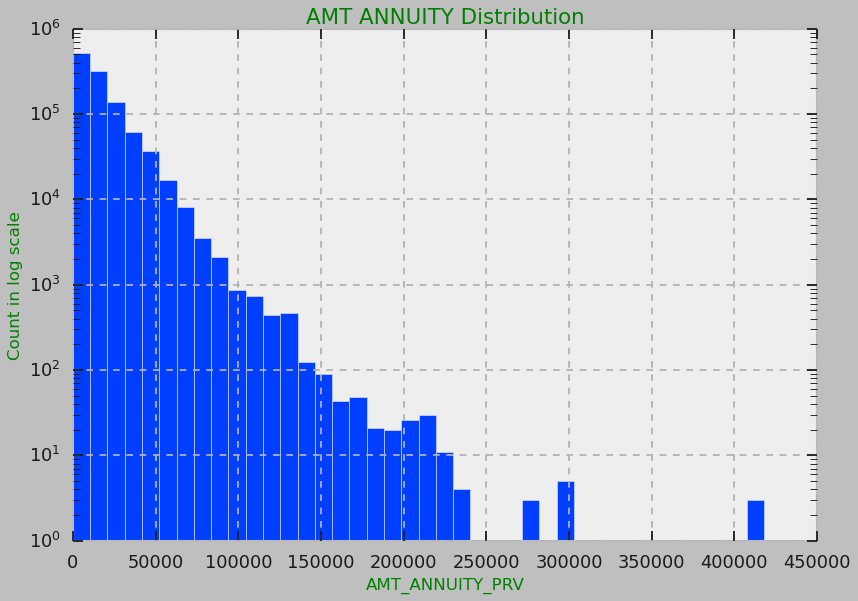

In [112]:
def univariate_hist(df,x_lab,bi,title):
    plt.figure(figsize=[12,8])
    plt.title( title, fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
    plt.xlabel(x_lab,fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
    plt.ylabel('Count in log scale',fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
    sty=['bmh','seaborn-deep', 'seaborn-pastel', 'classic',  'seaborn-poster',  'tableau-colorblind10', 'seaborn-bright']
    np.random.shuffle(sty)  
    plt.style.use(sty[0])
    plt.hist(df[x_lab],bins=bi,log=True )
    plt.title(title)
    plt.xlabel(x_lab)
    plt.ylabel('Count in log scale')
    plt.show()
univariate_hist(df_combine,'AMT_ANNUITY_PRV',40,'AMT ANNUITY Distribution')    

    



###### Inference from the above plot
1. Most customers have annuity amt of less than 50000
2. Few customers have annuity amt ferated than 2.5L which is an outlier

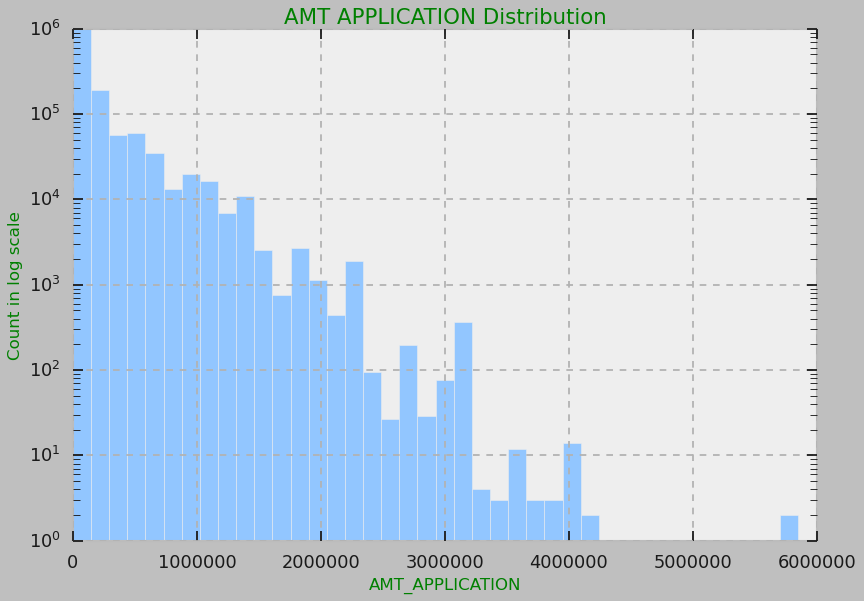

In [113]:
univariate_hist(df_combine,'AMT_APPLICATION',40,'AMT APPLICATION Distribution') 

###### Inference from the above plot
1. No of customer with loan apllication amt is higher in the range of 10L
2. Customer with loan application of higher than 50L is an outlier

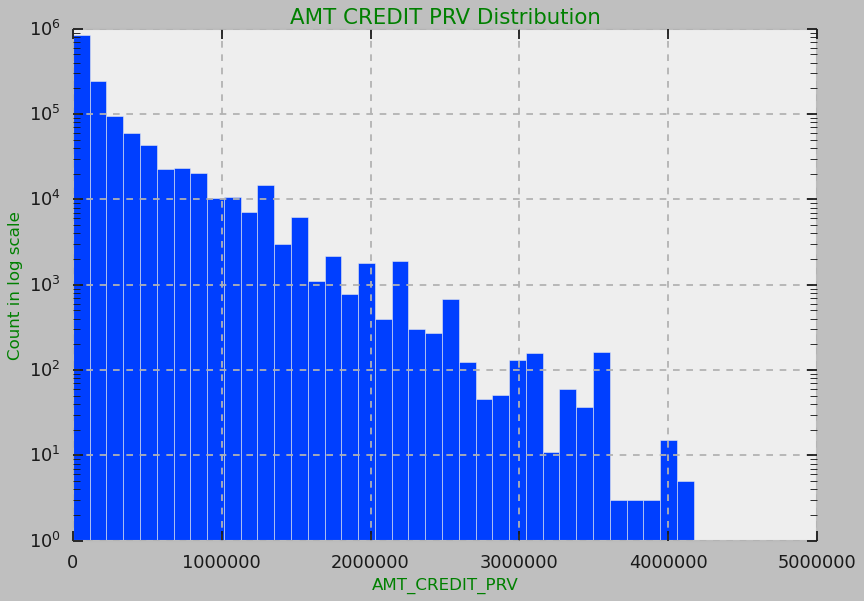

In [114]:
univariate_hist(df_combine,'AMT_CREDIT_PRV',40,'AMT CREDIT PRV Distribution')

###### Inference from the above plot
1. There are more no of customer in the lower credit range.
2. Count of customer with higher credit amt is comparatively low.

X in log scale


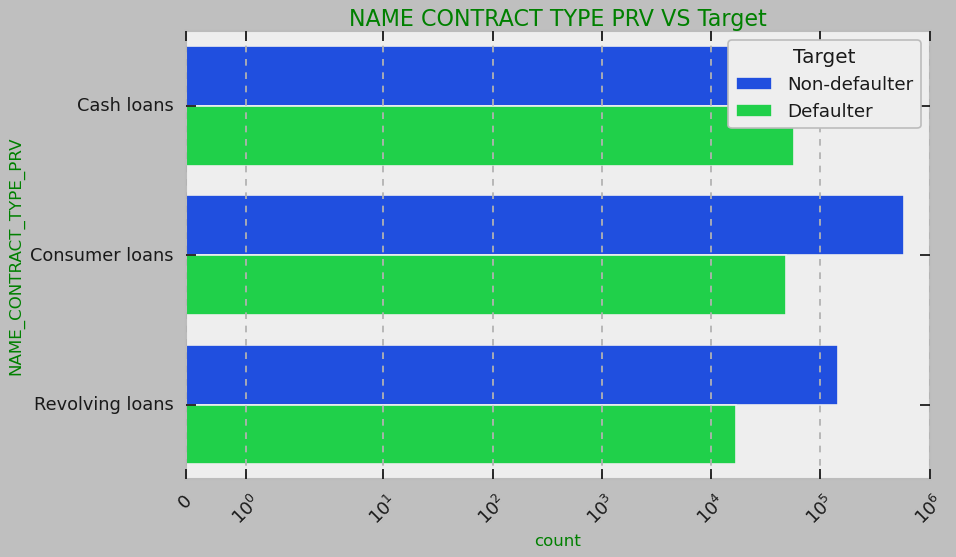

In [115]:
# Biivariate Analysis
# Customer with contract type status XNA is excluded from the analysis

bivariate_ana_y(df_combine[df_combine.NAME_CONTRACT_TYPE_PRV!='XNA'],'NAME_CONTRACT_TYPE_PRV','NAME CONTRACT TYPE PRV VS Target','Target') 

###### Inference from the above plot
1. Cash Loan and Consumer loan have the highest no of defaulter.
2. Revolving loan has least number of defaulter

seaborn-poster


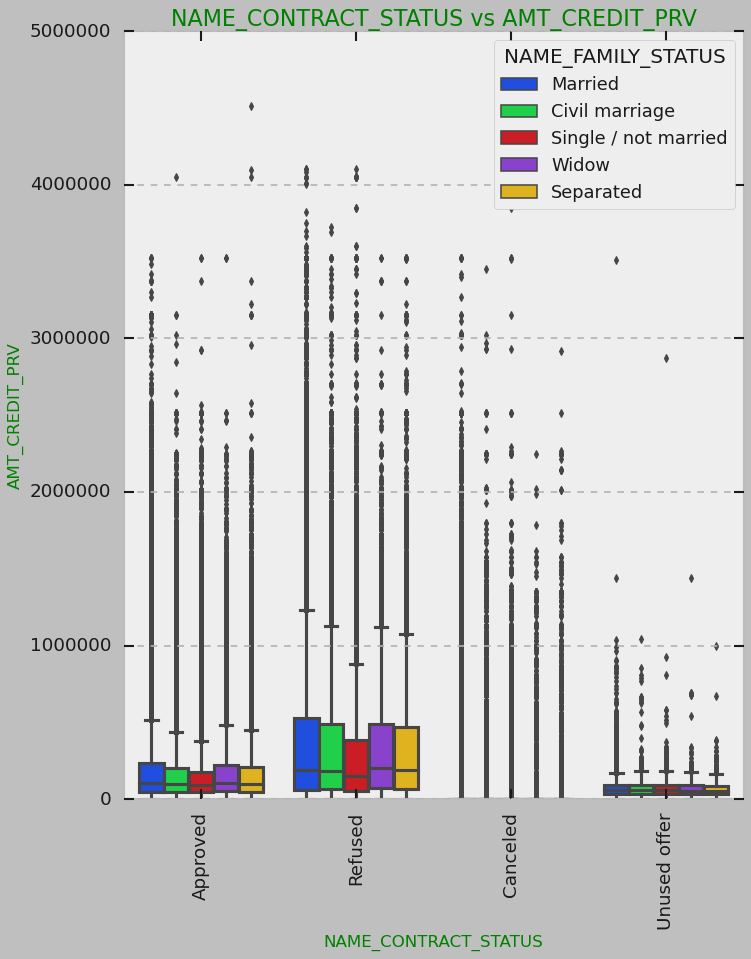

In [116]:
def box_plt_hue(df,x_axis,y_axis,title,hu):
    he=len(df[x_axis].unique())+4
    if he < 10:
        he=10
    else:
        he
    plt.figure(figsize=[he,12])
    plt.title( title, fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
    plt.xlabel(x_axis,fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
    plt.ylabel( y_axis,fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
    plt.xticks(rotation=90)
    sns.set_context('talk')
    sty=['bmh','seaborn-deep', 'seaborn-pastel', 'classic',  'seaborn-poster',  'tableau-colorblind10', 'seaborn-bright']
    np.random.shuffle(sty)  
    plt.style.use(sty[0])
    #plt.xscale('symlog')
    # bmh 'seaborn-deep', 'seaborn-pastel', 'classic',  'seaborn-poster',  'tableau-colorblind10', 'seaborn-bright'
    print(sty[0])    
    #plt.title('NAME_CONTRACT_TYPE vs AMT_CREDIT')
    sns.boxplot(data=df, x=x_axis,y=y_axis,hue=hu)
    plt.show()
box_plt_hue(df_combine,'NAME_CONTRACT_STATUS','AMT_CREDIT_PRV','NAME_CONTRACT_STATUS vs AMT_CREDIT_PRV','NAME_FAMILY_STATUS') 

###### Inference from the above plot
1. For cancelled status since the amt was not credited, the credit amt for cancelled cases is 0, There are outliers in cancelled cases where loan got cancelled post disbursement.
2. Outliers exist in all status Type.
3. We can observe outliers are continous in Married Family status with Approved loan status upto 25.5L

seaborn-deep


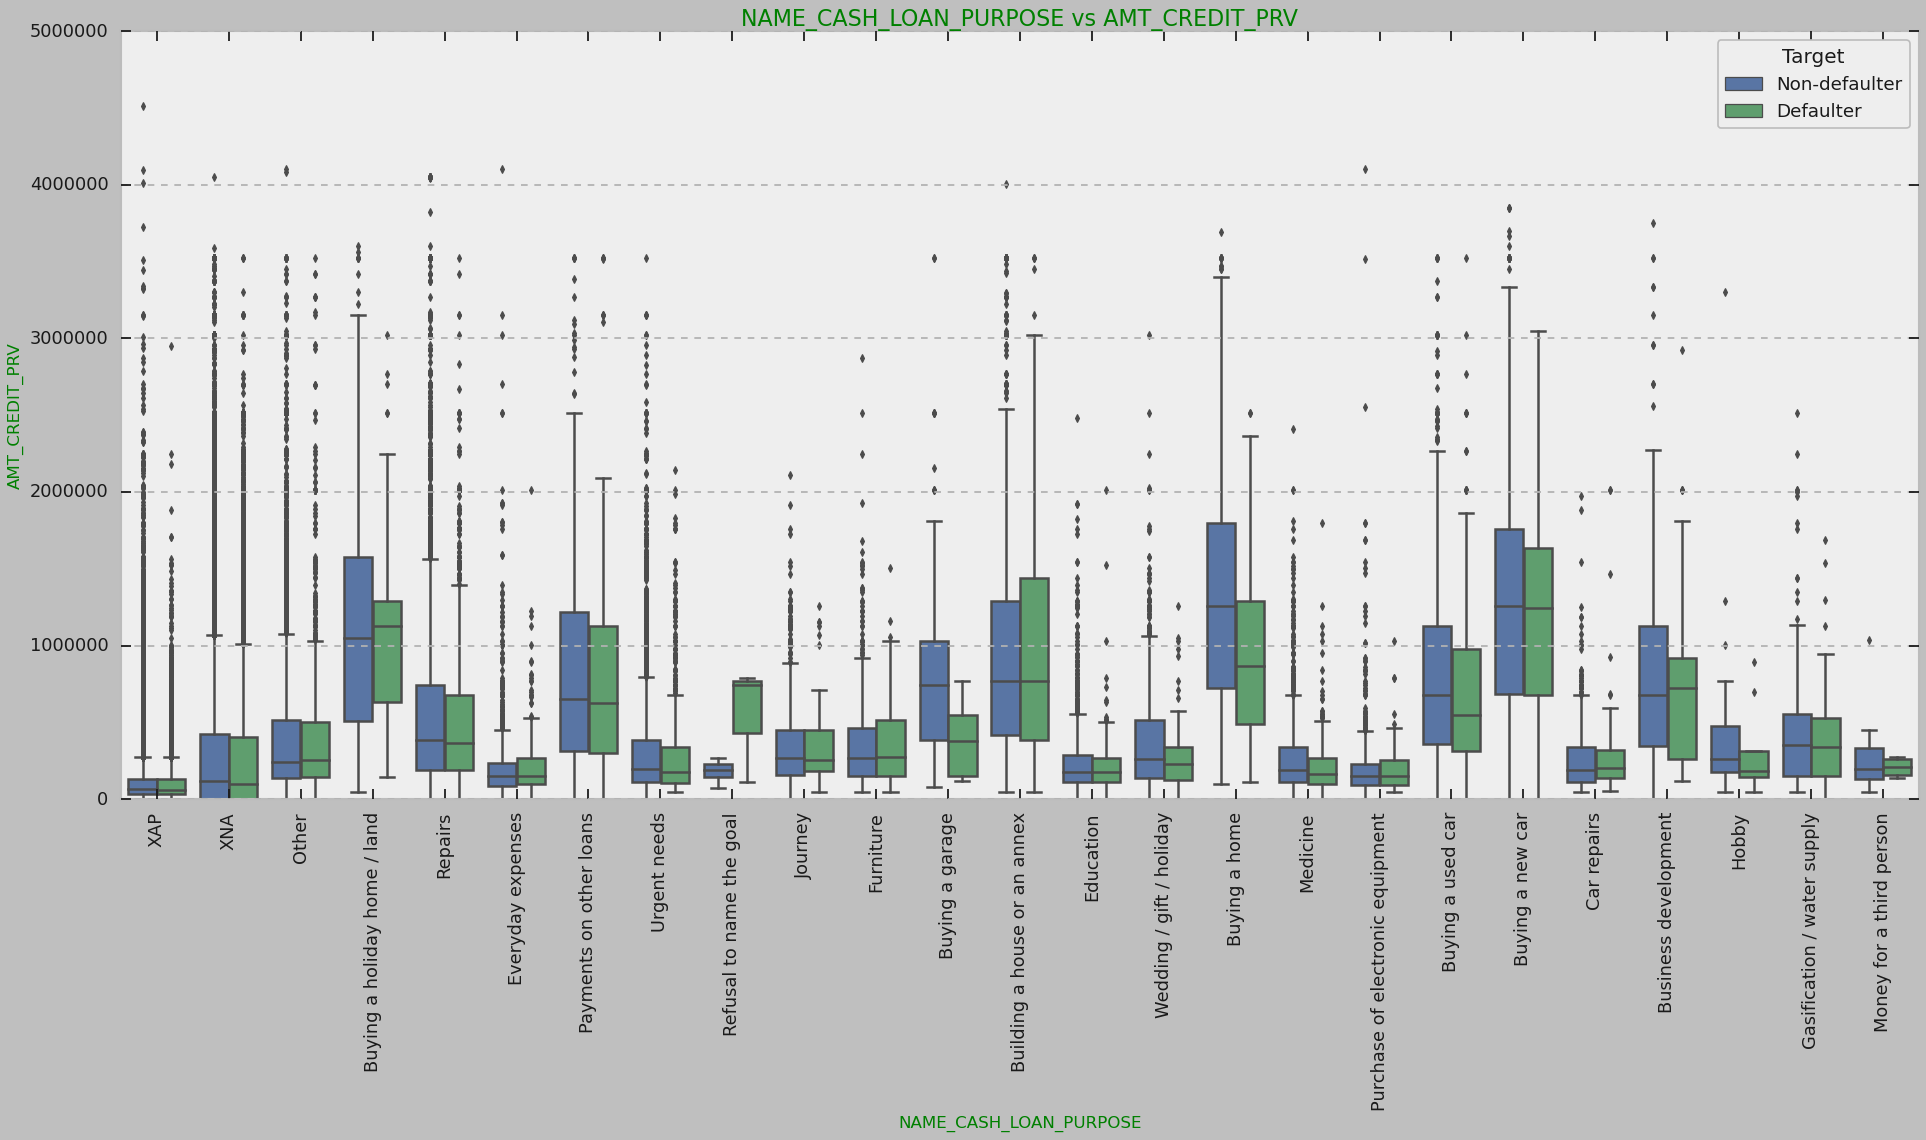

In [117]:


box_plt_hue(df_combine,'NAME_CASH_LOAN_PURPOSE','AMT_CREDIT_PRV','NAME_CASH_LOAN_PURPOSE vs AMT_CREDIT_PRV','Target') 

###### Inference from the above plot
1. Defaulter Customer whose loan purpose is refused to make a goal has the highest Median for Credit Amt in defaulter 
2. Defaulter Customer with loan purpose for Building a house for annex has 3rd quartile higher than its corresponding Non defaulter 3rd quartile range.
3. Non Defaulter customer with loan purpose for Buying a home has the highest median across all loan purposes.

X in log scale


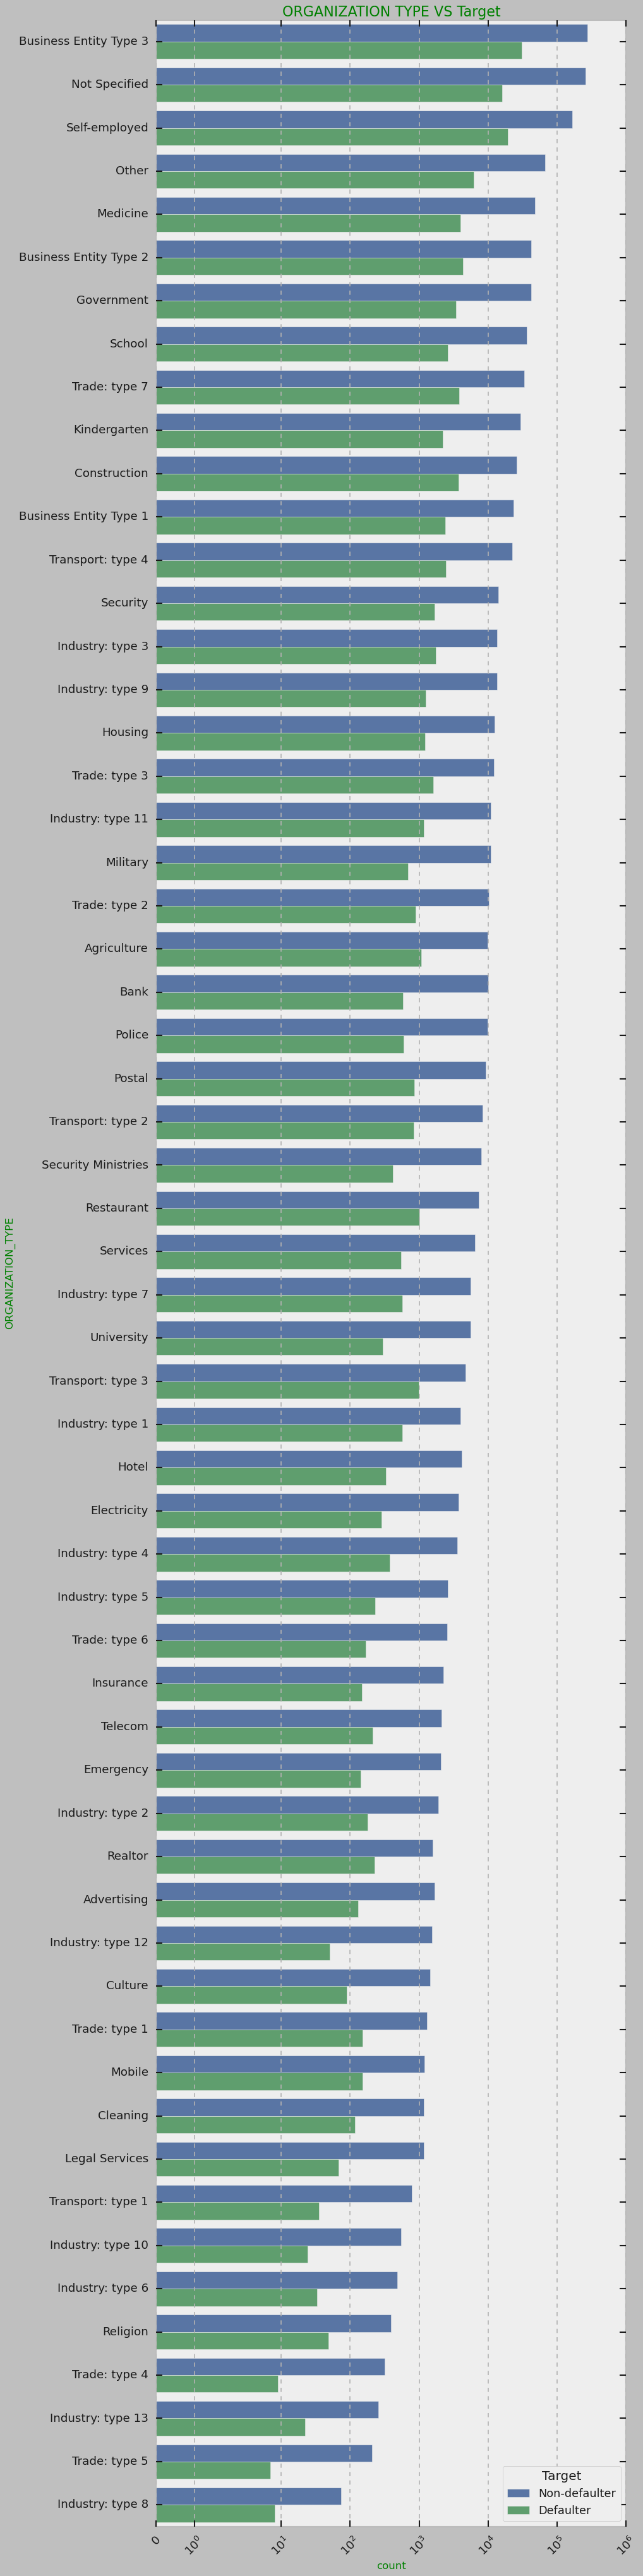

In [118]:
bivariate_ana_y(df_combine,'ORGANIZATION_TYPE','ORGANIZATION TYPE VS Target','Target') 

###### Inference from the above plot
1. Customer working in Business entity type has the highest number of defaulter. 
2.  Customer working in Indusry and trade type has the least number of defaulter

X in log scale


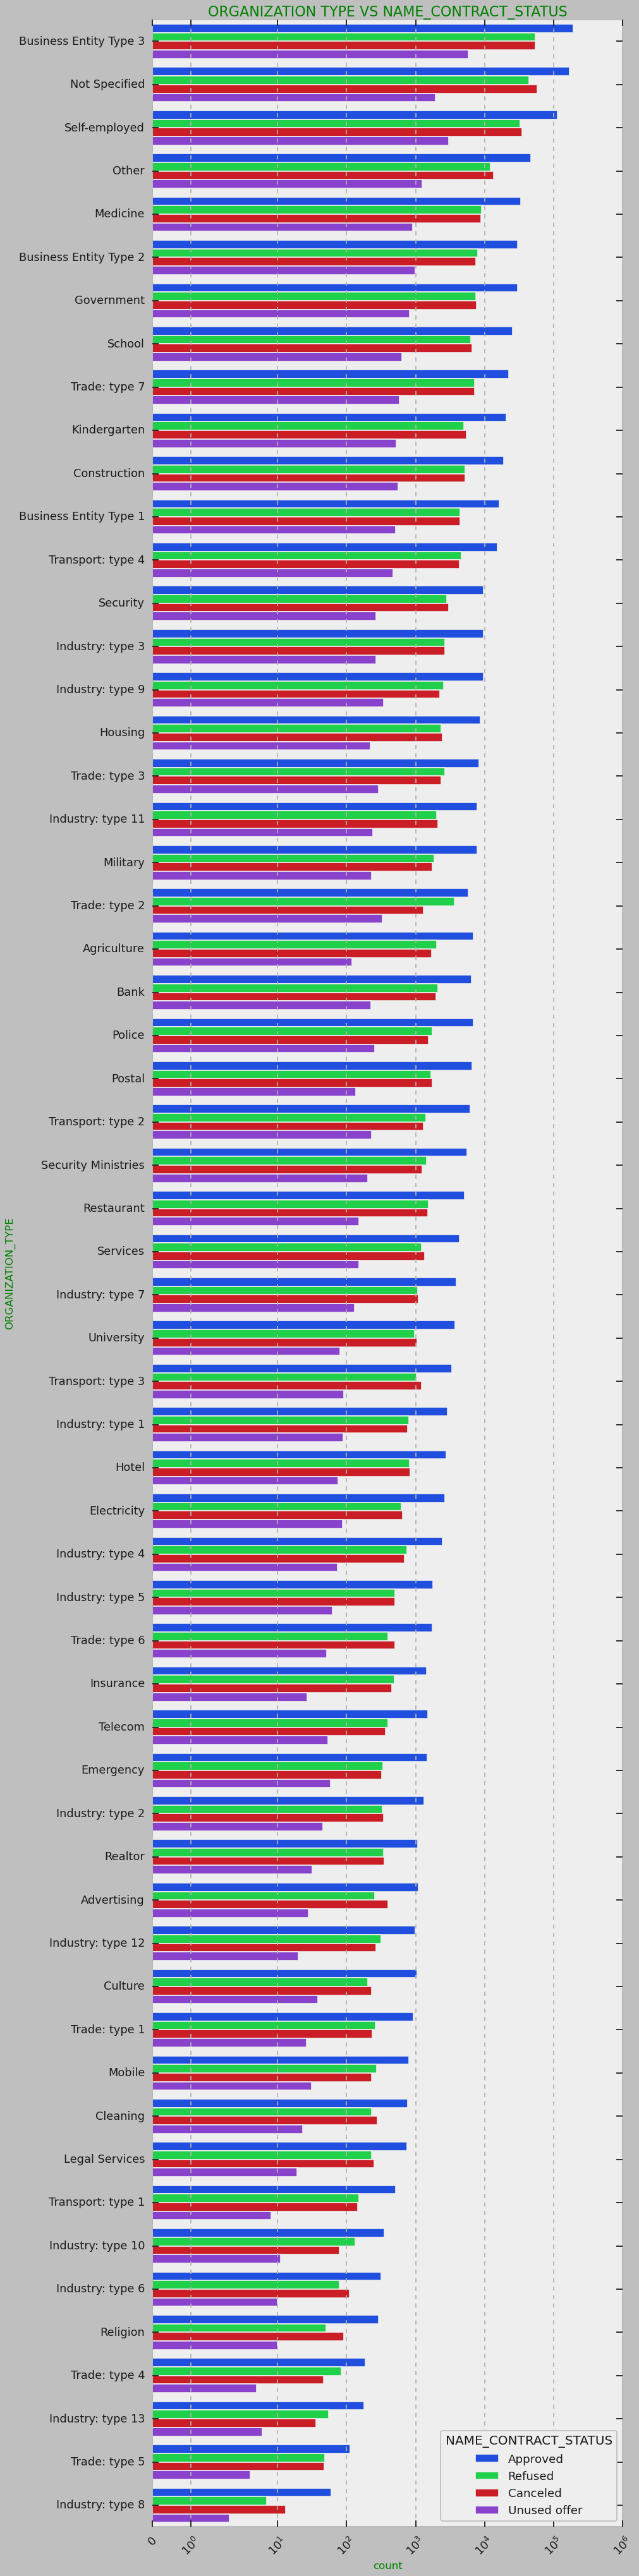

In [119]:
bivariate_ana_y(df_combine,'ORGANIZATION_TYPE','ORGANIZATION TYPE VS NAME_CONTRACT_STATUS','NAME_CONTRACT_STATUS') 

###### Inference from the above plot
1. Customer working in Business entity type 3 has the highest loan approval
2. Customer with not specified working type has the highest number of Cancellation

Y in log scale


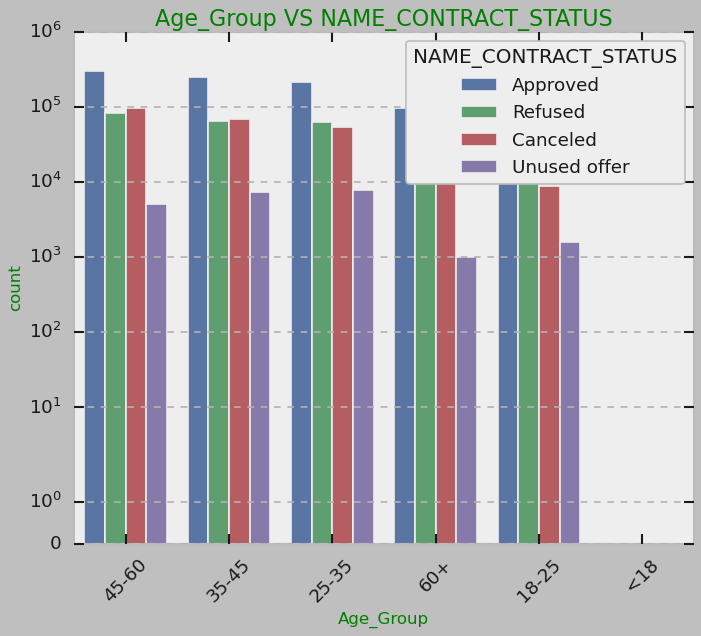

In [120]:
bivariate_ana(df_combine,'Age_Group','Age_Group VS NAME_CONTRACT_STATUS','NAME_CONTRACT_STATUS') 

###### Inference from the above plot
1. Student have no unused offer
2. Approval is higher for Working income type
3. For customer on maternity leave has the least loan approval 


Y in log scale


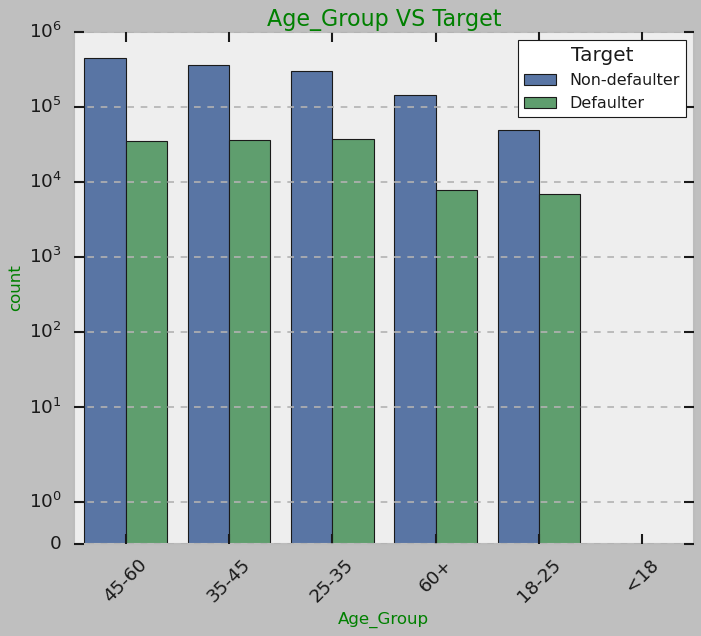

In [121]:
bivariate_ana(df_combine,'Age_Group','Age_Group VS Target','Target') 

###### Inference from the above plot
1. Customer of age group 25-35 ,35-45 and 45-60 have the highest no of defaulter
2. Customer of age group 60 + and 18-25 group have the least number of defaulter

X in log scale


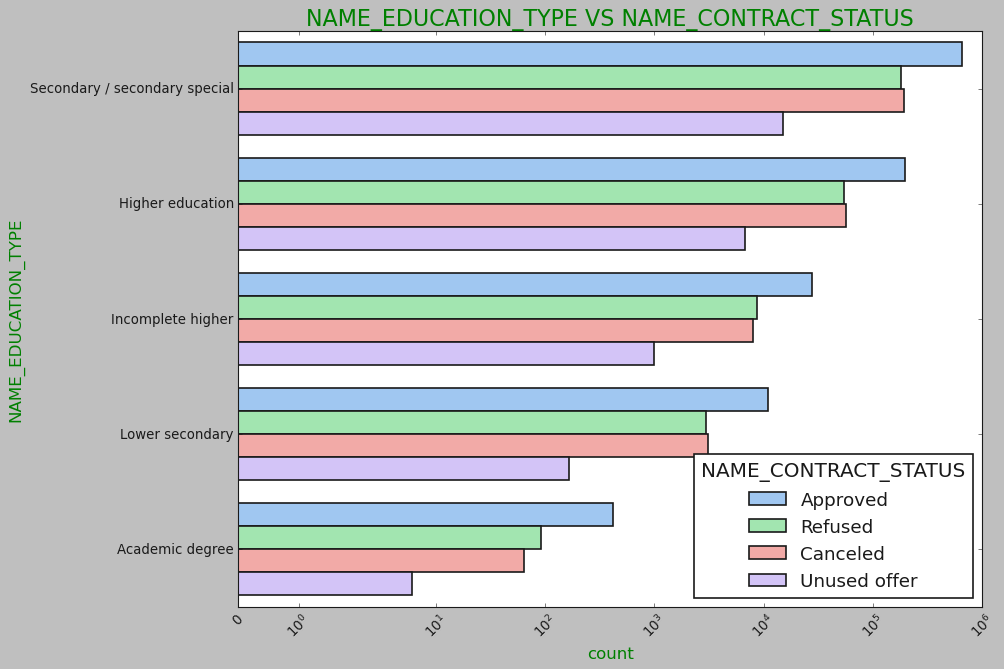

In [122]:
bivariate_ana_y(df_combine,'NAME_EDUCATION_TYPE','NAME_EDUCATION_TYPE VS NAME_CONTRACT_STATUS','NAME_CONTRACT_STATUS') 

###### Inference from the above plot
1. Academic degree holder have the least no of defaulter
2. Defaulters are higher for Secondary and Higher education qualification

Y in log scale


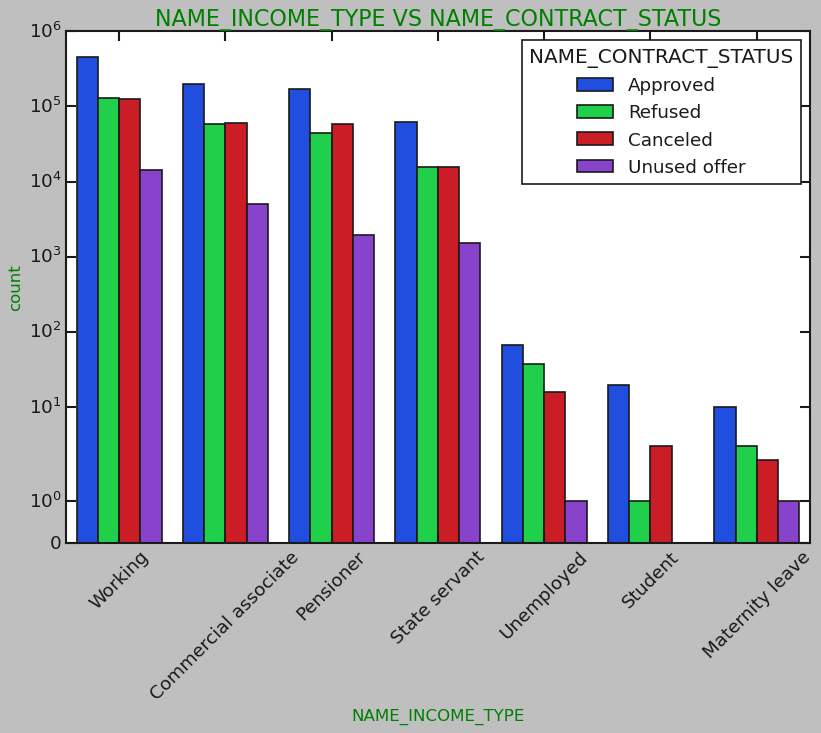

In [123]:
bivariate_ana(df_combine,'NAME_INCOME_TYPE','NAME_INCOME_TYPE VS NAME_CONTRACT_STATUS','NAME_CONTRACT_STATUS')

###### Inference from the above plot
1. Student have no unused offer
2. Approval is higher for Working income type
3. For customer on maternity leave has the least loan approval

Y in log scale


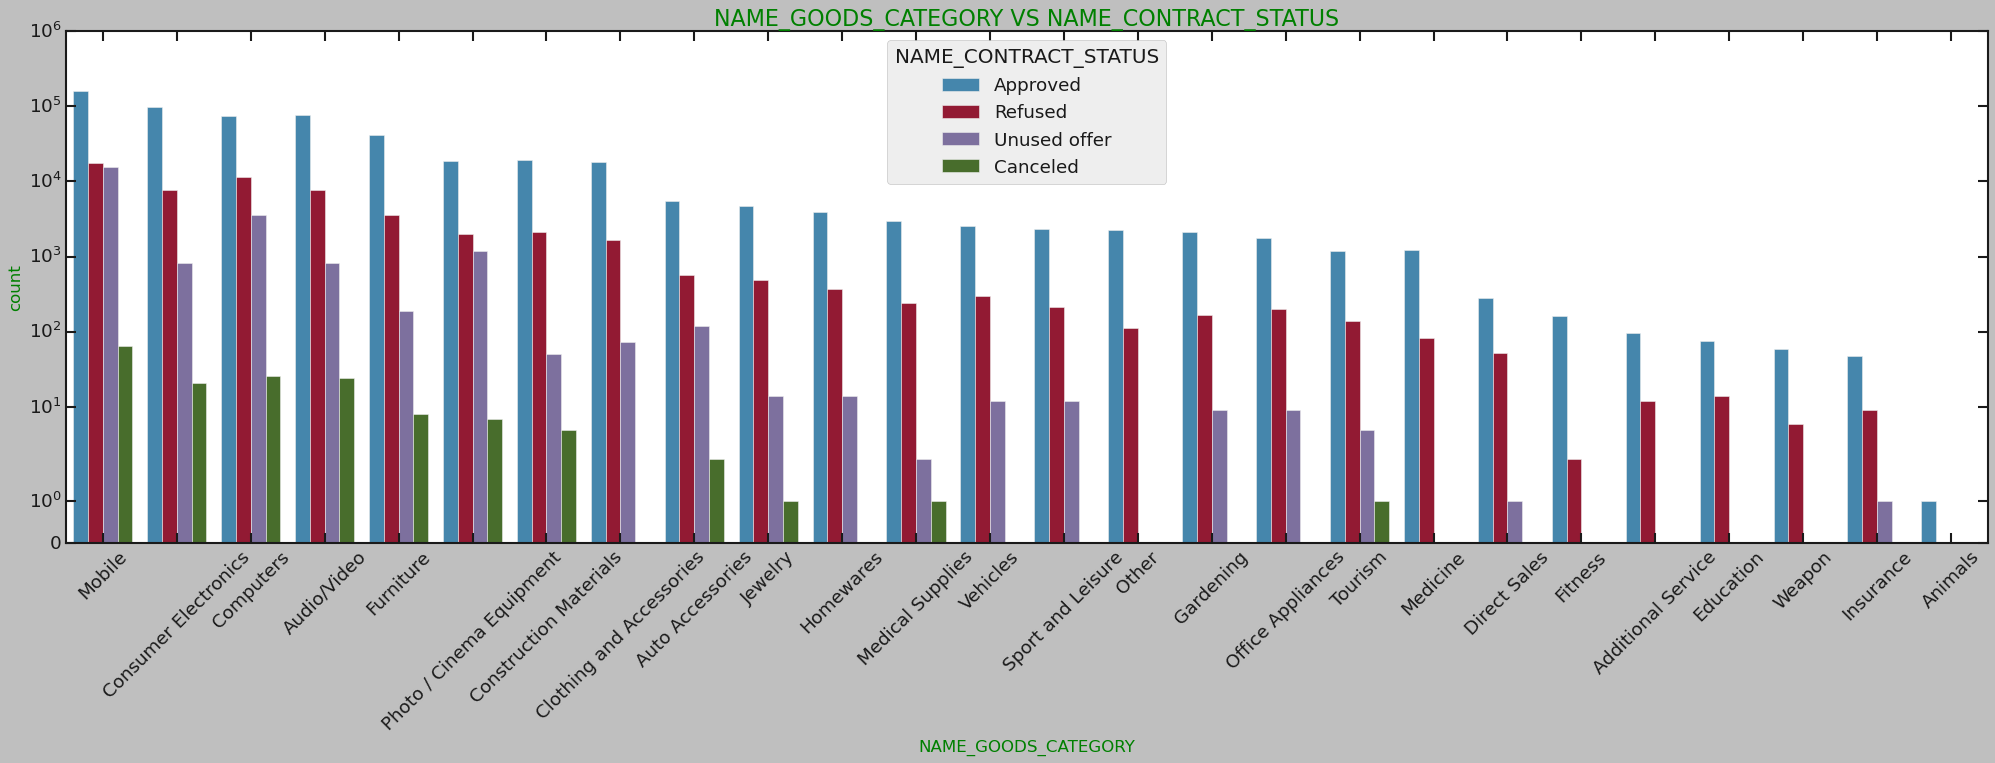

In [124]:
bivariate_ana(df_combine[df_combine.NAME_GOODS_CATEGORY!='XNA'],'NAME_GOODS_CATEGORY','NAME_GOODS_CATEGORY VS NAME_CONTRACT_STATUS','NAME_CONTRACT_STATUS')

###### Inference from the above plot
1. Customer with goods type as mobile has highest loan approval
2. Customer for goods type Others, Medicine, Fitness, additional service education ,weapon and animals has zero loan cancellation.

Y in log scale


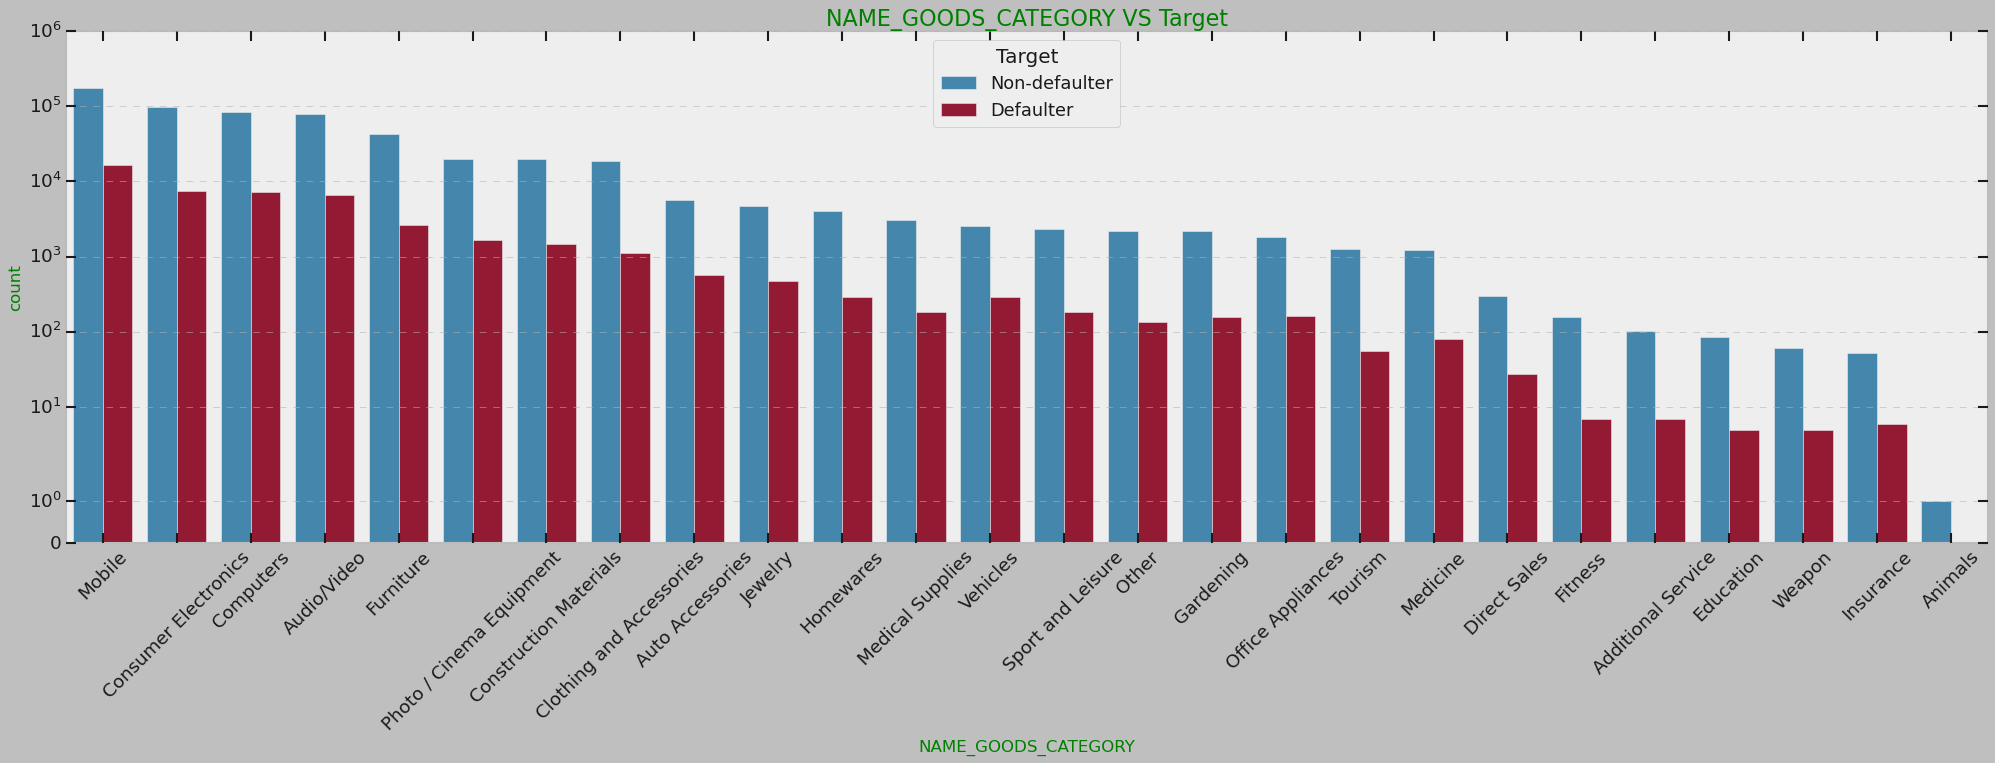

In [125]:
bivariate_ana(df_combine[df_combine.NAME_GOODS_CATEGORY!='XNA'],'NAME_GOODS_CATEGORY','NAME_GOODS_CATEGORY VS Target','Target')

###### Inference from the above plot
1. Customer with goods type fitness,  Additional service, education, weapon ,insurance and Animals has the least number of defaulters 
2. Defaulters are higher for Mobile and Computer electronics goods

Y in log scale


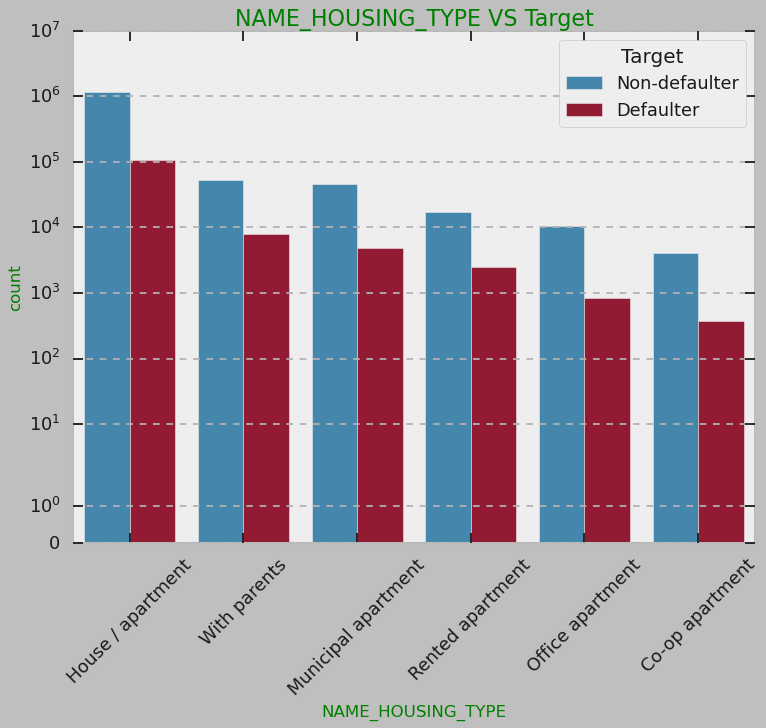

In [126]:

bivariate_ana(df_combine,'NAME_HOUSING_TYPE','NAME_HOUSING_TYPE VS Target','Target') 


###### Inference from the above plot
1. Customer with housing type Co-op apartment and office appartment has the least number of defaulter
2. Customer staying in House/ Apartment have the highest number of defaulter

### Suggestion to Banks

1. Banks Should issue loan Customer with Academic degree as they have least defaulter.
2. Loans should be issued to customer staying in Co-op apartment and office appartment because they have less chances of defaulting
3. Customer with age group 18-25 and customer with age 60+ have less chances of defaulting
4. Customer with loan purpose as refused to make goal should be avoided as they have high chances of defaulting
5. Customer with income type Student and buisness should be targeted as theit loan refusal rate is low.
6. Customer with goods type fitness,  Additional service, education, weapon ,insurance and Animals has the least number of defaulters 
7. Females have higher income than males and prefer credit more than males.
8. Customer with work experience of more than 45 have less chances to default
9. Customer with income higher than 5L are less likely to default.
10. Customer with credit limit less than 10 have high chances to default
